In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 사용전력량 & 충전소요시간

In [482]:
# 한국환경공단의 충전이력 데이터를 불러온다.
file = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/<최종>한국환경공단전처리완료.csv')
file.head()

,충전소명칭,충전기ID,한글주소,충전횟수,충전시작일,사용전력량,충전소요시간
0,DMC 산학협력연구센터,1,마포구,370,2020.10.10,15.85,0 days 00:21:00
1,DMC 산학협력연구센터,1,마포구,370,2020.10.12,6.90,0 days 00:18:00
2,DMC 산학협력연구센터,1,마포구,370,2020.10.13,21.20,0 days 00:40:00
3,DMC 산학협력연구센터,1,마포구,370,2020.10.14,32.64,0 days 00:50:00
4,DMC 산학협력연구센터,1,마포구,370,2020.10.15,25.84,0 days 00:33:00


In [483]:
# 충전소의 개수를 알기위한 가공 과정이다.
k = []
for i in range(1, len(file)):
    if file.loc[i,'충전기ID'] == file.loc[i-1,'충전기ID']:
        if file.loc[i,'충전소명칭'] == file.loc[i-1,'충전소명칭']:
            k.append(i)
file_2 = file.drop(index=k, axis=0)
file_2 = file_2.reset_index()
file_2.head()

,index,충전소명칭,충전기ID,한글주소,충전횟수,충전시작일,사용전력량,충전소요시간
0,0,DMC 산학협력연구센터,1,마포구,370,2020.10.10,15.85,0 days 00:21:00
1,206,Park M (주차복합빌딩),21,마포구,233,2020.10.1,53.75,0 days 05:25:00
2,281,Park M (주차복합빌딩),22,마포구,233,2020.10.1,31.44,1 days 14:51:00
3,372,SETEC,1,강남구,1288,2020.10.10,49.69,0 days 01:29:00
4,721,sh서울주택도시공사,11,강남구,475,2020.10.11,53.95,0 days 00:48:00


In [484]:
file_2.head()

,index,충전소명칭,충전기ID,한글주소,충전횟수,충전시작일,사용전력량,충전소요시간
0,0,DMC 산학협력연구센터,1,마포구,370,2020.10.10,15.85,0 days 00:21:00
1,206,Park M (주차복합빌딩),21,마포구,233,2020.10.1,53.75,0 days 05:25:00
2,281,Park M (주차복합빌딩),22,마포구,233,2020.10.1,31.44,1 days 14:51:00
3,372,SETEC,1,강남구,1288,2020.10.10,49.69,0 days 01:29:00
4,721,sh서울주택도시공사,11,강남구,475,2020.10.11,53.95,0 days 00:48:00


In [485]:
# 각 충전소별 사용전력량과 충전시간 합계를 불러온다.
file_3 = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/충전소별 사용전력량 및 충전시간 합계.csv')
file_3.head()

,충전소명칭,한글주소,사용전력량,충전소요시간
0,DMC 산학협력연구센터,마포구,7074.75,7 days 17:20:00
1,Park M (주차복합빌딩),마포구,4530.81,25 days 18:58:00
2,SETEC,강남구,22986.72,27 days 10:41:00
3,sh서울주택도시공사,강남구,9428.73,12 days 09:35:00
4,가락시장,송파구,35256.40,34 days 08:08:00


In [486]:
# 각 충전소별 충전기 개수를 file_3에 표시한다.
data = file_2.groupby('충전소명칭')['충전기ID'].count().values
file_3['충전기 개수'] = pd.Series(data, index = range(len(data)))
file_3.head()

,충전소명칭,한글주소,사용전력량,충전소요시간,충전기 개수
0,DMC 산학협력연구센터,마포구,7074.75,7 days 17:20:00,1
1,Park M (주차복합빌딩),마포구,4530.81,25 days 18:58:00,2
2,SETEC,강남구,22986.72,27 days 10:41:00,1
3,sh서울주택도시공사,강남구,9428.73,12 days 09:35:00,2
4,가락시장,송파구,35256.40,34 days 08:08:00,6


In [487]:
# 시계열 데이터를 합칠 수 있게 datatype 변경
file_3['충전소요시간'] = file_3['충전소요시간'].apply(lambda x: pd.to_timedelta(x))
# 구별 충전소요시간 더해줌
ev_tot = file_3.groupby('한글주소')['충전소요시간'].sum()
ev_tot = ev_tot.reset_index()
# 구별 사용전력량 더해줌
ev_tot['사용전력량'] = file_3.groupby('한글주소')['사용전력량'].sum().tolist()

In [488]:
ev_tot = ev_tot.rename(columns={'한글주소':'자치구'})
ev_tot.head()

,자치구,충전소요시간,사용전력량
0,강남구,697 days 21:40:00,430598.40
1,강동구,176 days 11:47:00,140422.50
2,강북구,64 days 00:40:00,57633.84
3,강서구,257 days 04:13:00,184012.83
4,관악구,360 days 02:00:00,259232.85


In [489]:
# 구별 충전기 개수를 합친다.
file_4 = file_3.groupby('한글주소')['충전기 개수'].sum().reset_index()
file_4.head()

,한글주소,충전기 개수
0,강남구,31
1,강동구,7
2,강북구,7
3,강서구,13
4,관악구,8


In [490]:
ev_tot = pd.merge(file_4, ev_tot, on='한글주소')

KeyError: '한글주소'

In [491]:
# datatime 으로 표시된 충전소요시간은 시간단위로 고친다.
ev_tot['충전소요시간'] = ev_tot['충전소요시간'].apply(lambda x: x/np.timedelta64(1, 'h'))

In [492]:
ev_tot.head()

,자치구,충전소요시간,사용전력량
0,강남구,16749.666667,430598.40
1,강동구,4235.783333,140422.50
2,강북구,1536.666667,57633.84
3,강서구,6172.216667,184012.83
4,관악구,8642.000000,259232.85


# 전기자동차등록대수

## 분석

In [493]:
data_evcar = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/21년-1월-기준-서울시-자동차-등록현황_동별_-연료별_.csv')

In [494]:
data_evcar = data_evcar[['사용본거지법정동명','동별 총 대수','전기']]
data_evcar['전기자동차 비율'] = 0
for i in range(len(data_evcar)):
    data_evcar.loc[i,'전기자동차 비율'] = data_evcar.loc[i,'전기'] / data_evcar.loc[i,'동별 총 대수'] * 100
data_evcar.sort_values(by='전기자동차 비율', ascending = False, inplace=True)
data_evcar.dropna(inplace = True)
data_evcar['행정동'] = data_evcar['사용본거지법정동명'].apply(lambda x : str(x).split(' ')[-1])
data_evcar.head()

,사용본거지법정동명,동별 총 대수,전기,전기자동차 비율,행정동
100,서울특별시 중구 태평로2가,388,183.0,47.164948,태평로2가
167,서울특별시 용산구 용산동1가,9,2.0,22.222222,용산동1가
439,서울특별시 강남구 대치동,39094,5938.0,15.189032,대치동
150,서울특별시 중구 무학동,123,11.0,8.943089,무학동
121,서울특별시 중구 예관동,252,22.0,8.730159,예관동


In [495]:
dong_evcar = data_evcar

In [496]:
gu_evcar = data_evcar
gu_evcar['자치구'] = data_evcar['사용본거지법정동명'].apply(lambda x: str(x).split(' ')[1])
gu_evcar = gu_evcar.groupby('자치구')[['동별 총 대수','전기']].sum()

In [497]:
gu_evcar
gu_evcar['전기자동차 비율'] = 0
for i in range(len(gu_evcar)):
    gu_evcar['전기자동차 비율'] = gu_evcar['전기'] / gu_evcar['동별 총 대수']

In [498]:
gu_evcar = gu_evcar.rename(columns={'전기':'전기자동차등록대수','동별 총 대수':'전체자동차등록대수'})
gu_evcar = gu_evcar.reset_index()

In [499]:
gu_evcar.head()

,자치구,전체자동차등록대수,전기자동차등록대수,전기자동차 비율
0,강남구,236709,7490.0,0.031642
1,강동구,150352,657.0,0.004370
2,강북구,75762,302.0,0.003986
3,강서구,204882,839.0,0.004095
4,관악구,119306,413.0,0.003462


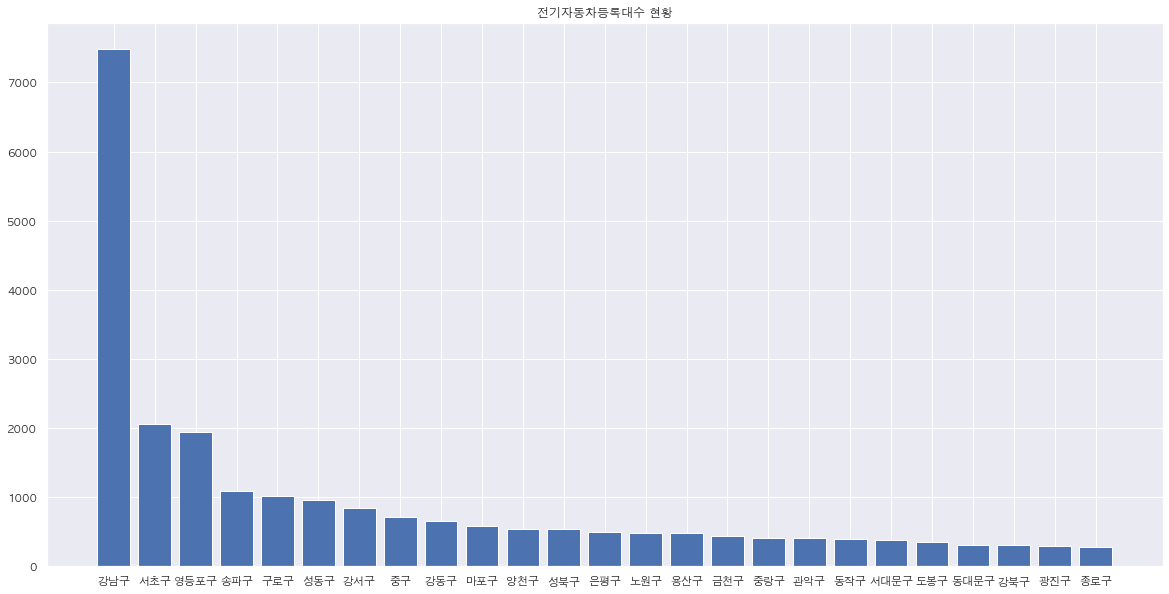

In [500]:
gu_evcar = gu_evcar.sort_values(by = '전기자동차등록대수', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_evcar))
y = gu_evcar['전기자동차등록대수'].tolist()
plt.title('전기자동차등록대수 현황')
plt.bar(x, y)
plt.xticks(x, gu_evcar['자치구'])
plt.show()

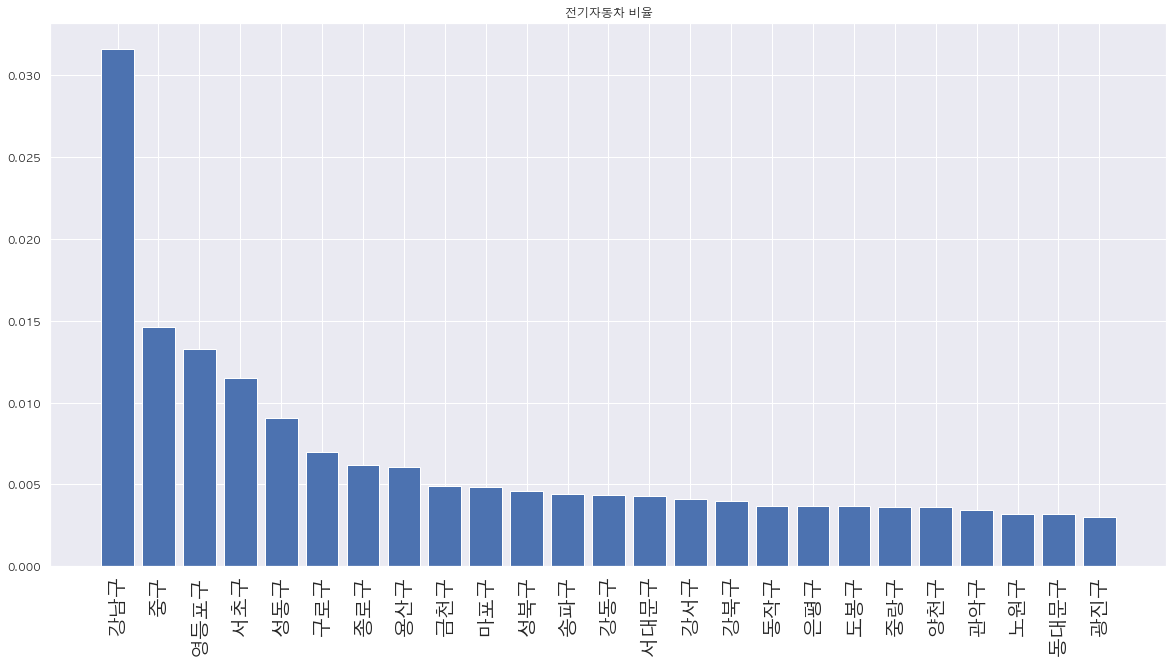

In [501]:
gu_evcar = gu_evcar.sort_values(by = '전기자동차 비율', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_evcar))
y = gu_evcar['전기자동차 비율'].tolist()
plt.title('전기자동차 비율')
plt.bar(x, y)
plt.xticks(x, gu_evcar['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

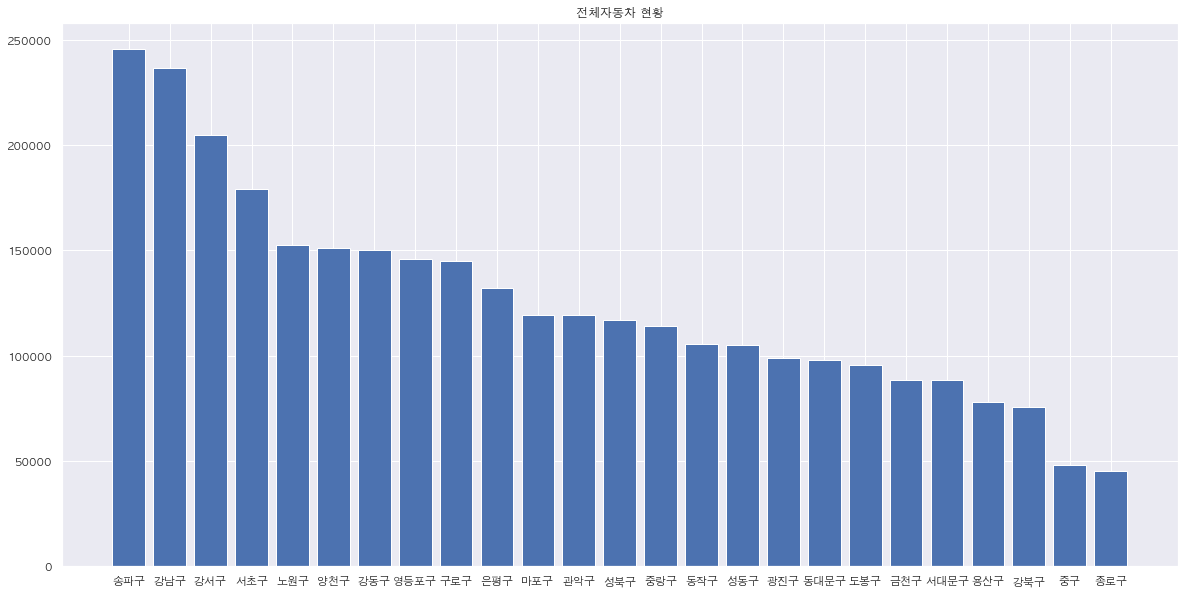

In [502]:
gu_evcar = gu_evcar.sort_values(by = '전체자동차등록대수', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_evcar))
y = gu_evcar['전체자동차등록대수'].tolist()
plt.title('전체자동차 현황')
plt.bar(x, y)
plt.xticks(x, gu_evcar['자치구'])
plt.show()

In [503]:
gu_evcar.head()

,자치구,전체자동차등록대수,전기자동차등록대수,전기자동차 비율
17,송파구,245889,1084.0,0.004408
0,강남구,236709,7490.0,0.031642
3,강서구,204882,839.0,0.004095
14,서초구,179198,2059.0,0.011490
8,노원구,152828,488.0,0.003193


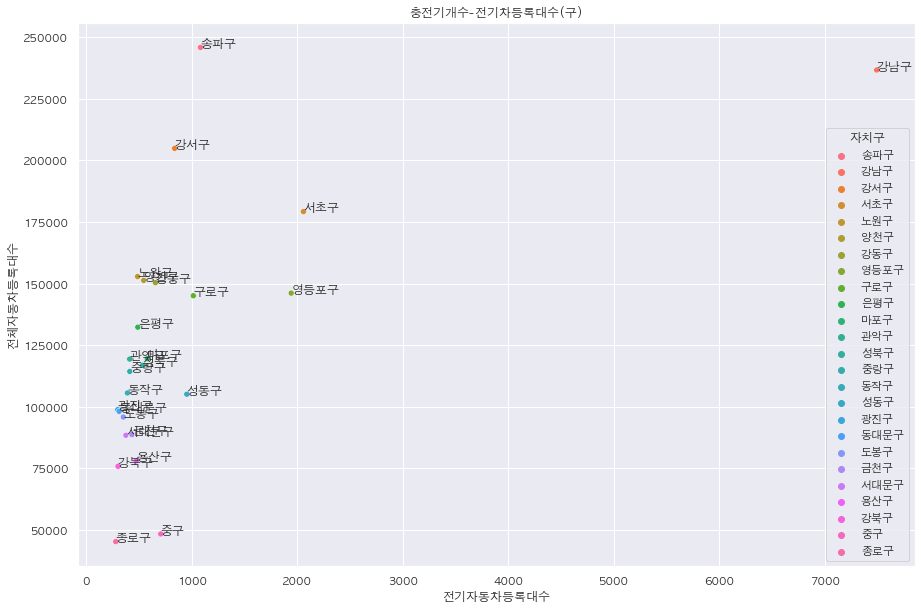

In [504]:
# 왜 강남과 서초 그리고 영등포구는 다른 구들에 비해 전기차 등록대수가 많을까? 전체가 다 골고루 많은 것인가?
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('충전기개수-전기차등록대수(구)')
plt.xlabel('전기자동차등록대수')
plt.ylabel('전체자동차등록대수')
sns.scatterplot(x=gu_evcar['전기자동차등록대수'].tolist(), y=gu_evcar['전체자동차등록대수'].tolist(), hue='자치구', data=gu_evcar)
for i, label in enumerate(gu_evcar['자치구']):
    plt.annotate(label, (gu_evcar['전기자동차등록대수'].tolist()[i], gu_evcar['전체자동차등록대수'].tolist()[i]))

In [718]:
data_evcar.head()

,사용본거지법정동명,동별 총 대수,전기,전기자동차 비율,행정동,자치구
100,서울특별시 중구 태평로2가,388,183.0,47.164948,태평로2가,중구
167,서울특별시 용산구 용산동1가,9,2.0,22.222222,용산동1가,용산구
439,서울특별시 강남구 대치동,39094,5938.0,15.189032,대치동,강남구
150,서울특별시 중구 무학동,123,11.0,8.943089,무학동,중구
121,서울특별시 중구 예관동,252,22.0,8.730159,예관동,중구


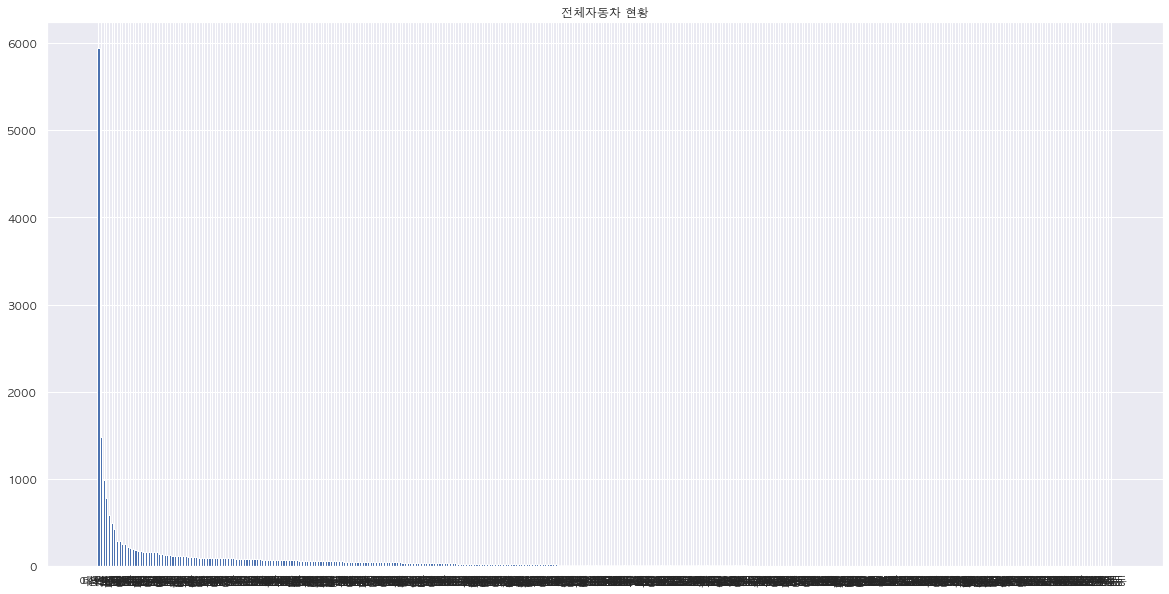

In [724]:
gu_evcar = data_evcar.sort_values(by = '전기', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_evcar))
y = gu_evcar['전기'].tolist()
plt.title('전체자동차 현황')
plt.bar(x, y)
plt.xticks(x, gu_evcar['행정동'])
plt.show()

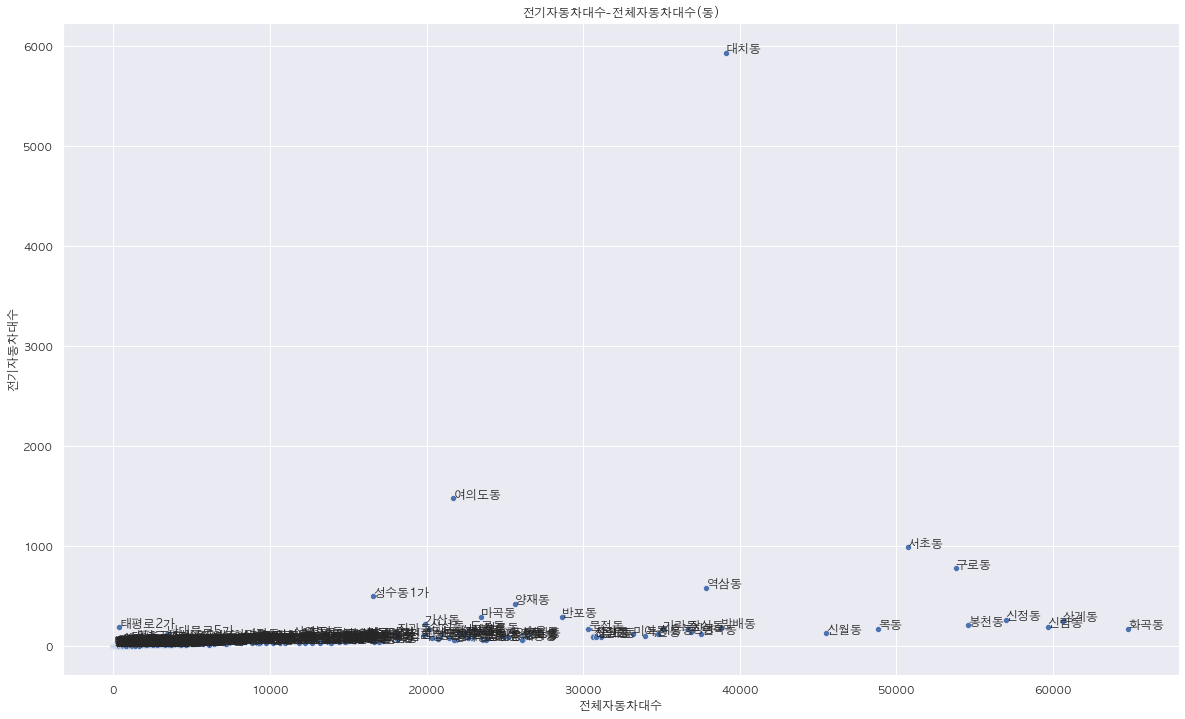

In [505]:
colors = np.random.rand(25)
sns.set(rc = {'figure.figsize':(20,12)})
plt.rc('font', family='AppleGothic')
plt.title('전기자동차대수-전체자동차대수(동)')
plt.xlabel('전체자동차대수')
plt.ylabel('전기자동차대수')
sns.scatterplot(x=data_evcar['동별 총 대수'].tolist() , y=data_evcar['전기'].tolist(), data=data_evcar)
for i, label in enumerate(data_evcar['행정동']):
    plt.annotate(label, (data_evcar['동별 총 대수'].tolist()[i], data_evcar['전기'].tolist()[i]))

In [506]:
# 전기자동차는 서울시 전역에 고루 퍼져있는 것이 아니라 특정 동에 집중되어 있다.
deachi_evcar_ratio = data_evcar[data_evcar['행정동']=='대치동']['전기'].tolist()[0] / data_evcar['전기'].sum() * 100
print(deachi_evcar_ratio)
yeouido_evcar_ratio = data_evcar[data_evcar['행정동']=='여의도동']['전기'].tolist()[0] / data_evcar['전기'].sum() * 100
print(yeouido_evcar_ratio)
seocho_evcar_ratio = data_evcar[data_evcar['행정동']=='서초동']['전기'].tolist()[0] / data_evcar['전기'].sum() * 100
print(seocho_evcar_ratio)
dy_total = deachi_evcar_ratio+yeouido_evcar_ratio+seocho_evcar_ratio
print(f'서울시 전체 전기차의 {dy_total}%가 대치동, 여의도동, 서초동 단 3개의 동에 집중되어 있다.')

25.331683801885585
6.317989846849537
4.202039162151785
서울시 전체 전기차의 35.85171281088691%가 대치동, 여의도동, 서초동 단 3개의 동에 집중되어 있다.


## 전기차등록대수 vs EV충전량

In [552]:
final_1 = pd.merge(ev_tot,gu_evcar[['전기자동차등록대수','자치구']], on='자치구')
final_1.head()

,자치구,충전소요시간,사용전력량,전기자동차등록대수
0,강남구,16749.666667,430598.40,7490.0
1,강동구,4235.783333,140422.50,657.0
2,강북구,1536.666667,57633.84,302.0
3,강서구,6172.216667,184012.83,839.0
4,관악구,8642.000000,259232.85,413.0


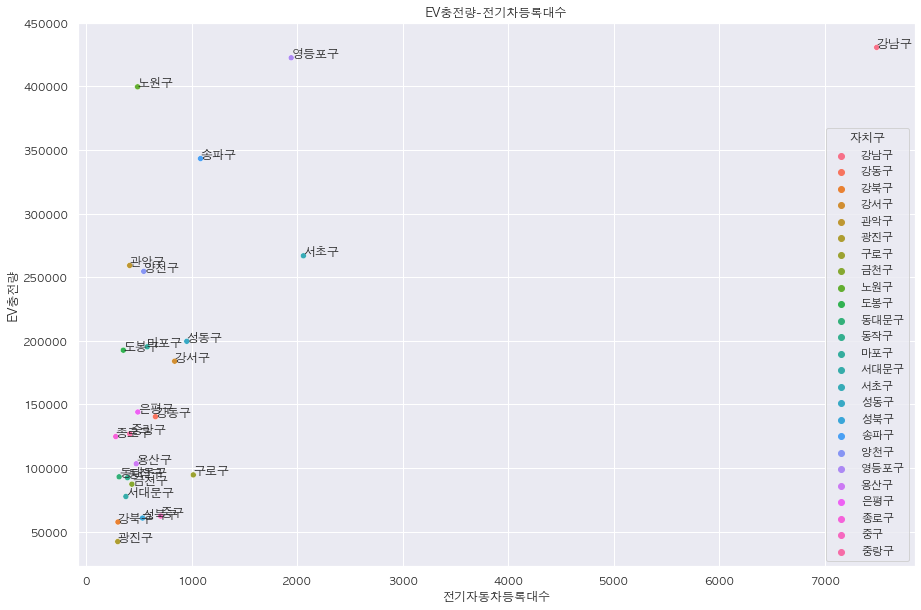

In [508]:
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-전기차등록대수')
plt.xlabel('전기자동차등록대수')
plt.ylabel('EV충전량')
sns.scatterplot(x=final_1['전기자동차등록대수'].tolist(), y=final_1['사용전력량'].tolist(), hue='자치구', data=final_1)
for i, label in enumerate(final_1['자치구']):
    plt.annotate(label, (final_1['전기자동차등록대수'].tolist()[i], final_1['사용전력량'].tolist()[i]))

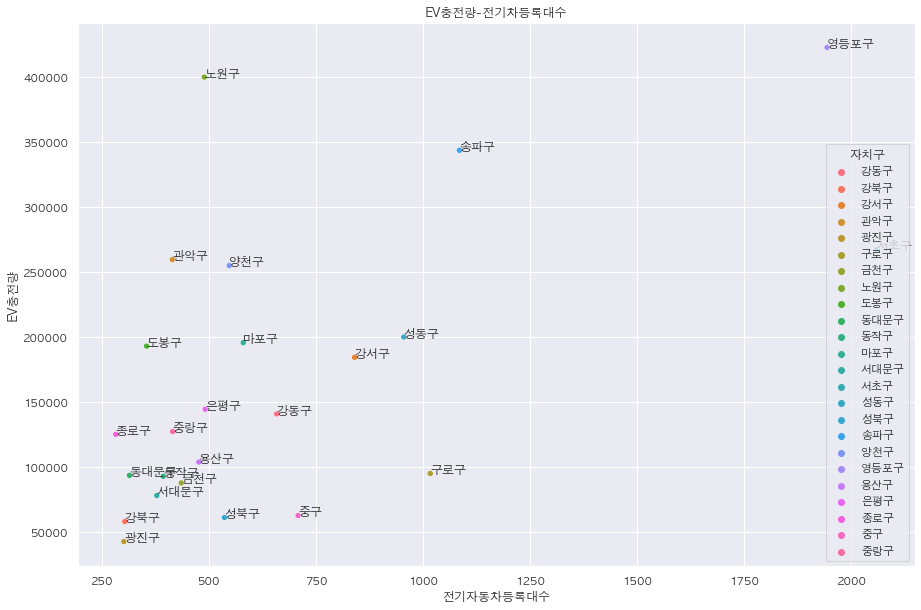

In [509]:
# 강남구 제외
final_1 = final_1.drop(final_1.index[0])
final_1 = final_1.reset_index()

sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-전기차등록대수')
plt.xlabel('전기자동차등록대수')
plt.ylabel('EV충전량')
sns.scatterplot(x=final_1['전기자동차등록대수'].tolist(), y=final_1['사용전력량'].tolist(), hue='자치구', data=final_1)
for i, label in enumerate(final_1['자치구']):
    plt.annotate(label, (final_1['전기자동차등록대수'].tolist()[i], final_1['사용전력량'].tolist()[i]))

# 충전기개수

## 분석

In [96]:
file_path = '/Users/minkyuramen/Desktop/데멘토/분석데이터/한국전력전기충전소설치현황.csv'
evst = pd.read_csv(file_path, sep=',')

In [97]:
columns = ['설치장소']
series = pd.Series(evst['설치장소'],index=np.arange(len(evst['주소'])))
result = pd.DataFrame(series, columns=columns)
result['주소'] = evst['주소']
result['충전기개수'] = evst.loc[:,'급속충전기(대)'] + evst.loc[:,'완속충전기(대)']
result['행정구'] = result['주소'].apply(lambda x: str(x).split(' ')[1])

In [98]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
# 데이터에서 주소가 도로명 주소로 되어 있지만. 도로명 주소에는 행정동 정보를 포함하지 않아 도로명 주소를 구주소로 고쳐 구조소에 표기되어 있는
# 행정동 정보를 얻기 위해 크롤링함.
path = '/Users/minkyuramen/Desktop/important/chromedriver'
source_url = 'https://www.juso.go.kr/openIndexPage.do'
driver = webdriver.Chrome(path)

invert_list = []
for i in range(len(evst['주소'])):
    if evst.loc[i,'주소'].split(' ')[2][-1] == '동':
        result.loc[i,'행정동'] = evst.loc[i,'주소'].split(' ')[2]
        evst.loc[i,'주소'] = str(' '.join(evst.loc[i,'주소'].split()[:2]))+' '+str(' '.join(evst.loc[i,'주소'].split()[3:]))
        
    elif evst.loc[i,'주소'].split(')')[0][-1] == '동':
        result.loc[i,'행정동'] = evst.loc[i,'주소'].split('(')[1].split(')')[0]
        evst.loc[i,'주소'] = str(''.join(evst.loc[i,'주소'].split('(')[0]))
        
    elif evst.loc[i,'주소'].split(',')[0][-1] == '동':
        result.loc[i,'행정동'] = evst.loc[i,'주소'].split(',')[0].split('(')[1]
        evst.loc[i,'주소'] = str(''.join(evst.loc[i,'주소'].split('(')[0]))
        
    else:
        driver.get(source_url)
        searchbox = driver.find_element_by_xpath("//input[@id='inputSearchAddr']")
        searchbox.send_keys(evst.loc[i,'주소'])
        searchbutton = driver.find_element_by_xpath("//button[@class='btn_search searchBtn']")
        driver.execute_script('arguments[0].click();', searchbutton)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        try:
            loc = soup.select_one('#list1 > div.subejct_2 > span.roadNameText').get_text()
            loc = loc.split()[2]
        except:
            loc = None
        deletebutton = driver.find_element_by_xpath("//*[@id='AKCFrm']/fieldset/div[1]/div[1]/div/a")
        driver.execute_script('arguments[0].click();', deletebutton)
        result.loc[i,'행정동'] = loc

In [259]:
# 크롤링 하여 얻은 행정동 정보를 기존의 데이터에 추가
result = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/충전소_구동.csv').drop(['Unnamed: 0'], axis=1)
result = result.rename(columns={'행정구':'자치구'})
result.head()

,설치장소,주소,충전기개수,자치구,행정동
0,LH강남힐스테이트,서울특별시 강남구 자곡동 자곡로3길 21,5,강남구,자곡동
1,LH서울지사,서울특별시 강남구 선릉로 121길 12,1,강남구,논현동
2,가람아파트,서울특별시 강남구 일원동 일원로 127,1,강남구,일원동
3,강남구청 공영주차장,서울특별시 강남구 삼성동 16-1,1,강남구,논현동
4,강남데시앙파크,서울특별시 강남구 세곡동 헌릉로590길 63,2,강남구,세곡동


In [260]:
result_1 = result.groupby('행정동').sum()
result_1['충전소개수'] = result['행정동'].value_counts().sort_index()
result_1 = result_1.reset_index()
result_2 = result[['자치구','행정동']]

In [261]:
merge_outer = pd.merge(result_1,result_2, how='outer',on='행정동')
final_ = merge_outer.drop_duplicates()
final_ = final_.reset_index()
dong_ev = final_.drop(['index'], axis=1)
dong_ev.head()

,행정동,충전기개수,충전소개수,자치구
0,가락동,13.0,4.0,송파구
1,가리봉동,1.0,1.0,구로구
2,가산동,1.0,1.0,금천구
3,가양동,2.0,1.0,강서구
4,강일동,15.0,7.0,강동구


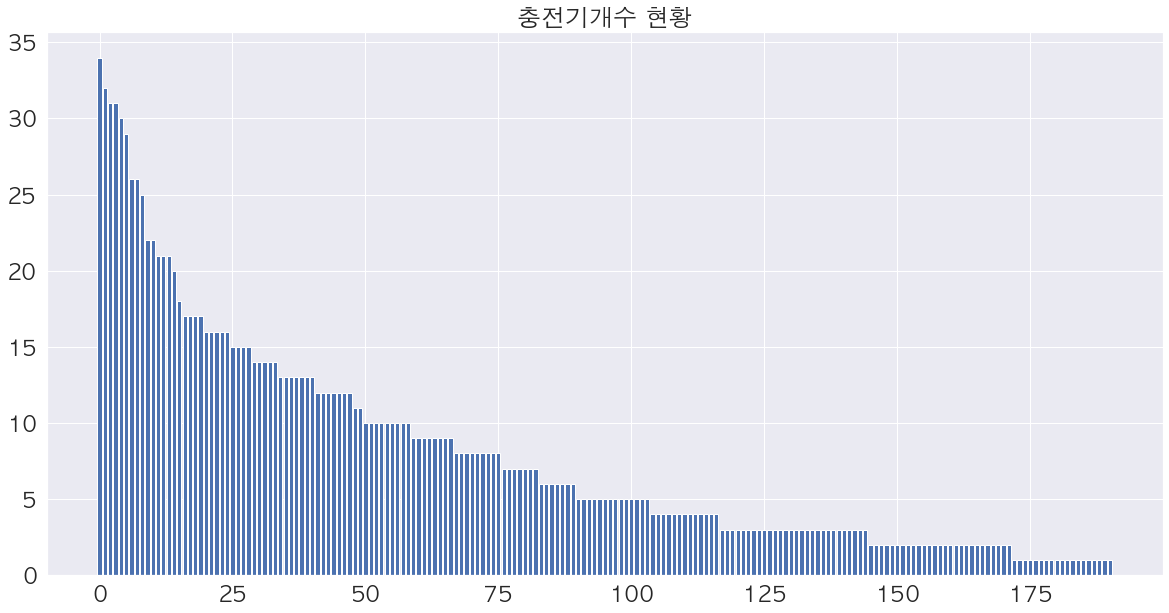

In [344]:
dong_ev = dong_ev.sort_values(by = '충전기개수', ascending=False)
plt.figure(figsize=(20,10))
x = np.arange(len(dong_ev))
y = dong_ev['충전기개수'].tolist()
plt.title('충전기개수 현황')
plt.bar(x, y)
plt.show()

In [263]:
dong_ev = dong_ev.reset_index()
dong_ev.head()

,index,행정동,충전기개수,충전소개수,자치구
0,67,방배동,34.0,14.0,서초구
1,89,서초동,32.0,16.0,서초구
2,5,개봉동,31.0,10.0,구로구
3,82,상계동,31.0,13.0,노원구
4,154,장지동,30.0,10.0,송파구


In [264]:
top3_evstation = dong_ev.loc[:2]['충전소개수'].sum()

In [265]:
top3_evstation_ratio = dong_ev.loc[:2]['충전소개수'].sum() / dong_ev['충전소개수'].sum() * 100
print(top3_evstation_ratio)
top10_evstation_ratio = dong_ev.loc[:9]['충전소개수'].sum() / dong_ev['충전소개수'].sum() * 100
print(top10_evstation_ratio)

6.86106346483705
18.524871355060036


In [269]:
gu_ev = dong_ev.groupby('자치구')['충전기개수'].sum()
gu_ev = gu_ev.reset_index()

In [270]:
gu_ev.head()

,자치구,충전기개수
0,강남구,118.0
1,강동구,82.0
2,강북구,25.0
3,강서구,67.0
4,관악구,28.0


## 충전기개수 vs EV충전량

In [271]:
final_2 = pd.merge(ev_tot,gu_ev[['충전기개수','자치구']], on='자치구')
final_2.head()

,자치구,충전기 개수,충전소요시간,사용전력량,충전기개수
0,강남구,31,16749.666667,430598.40,118.0
1,강동구,7,4235.783333,140422.50,82.0
2,강북구,7,1536.666667,57633.84,25.0
3,강서구,13,6172.216667,184012.83,67.0
4,관악구,8,8642.000000,259232.85,28.0


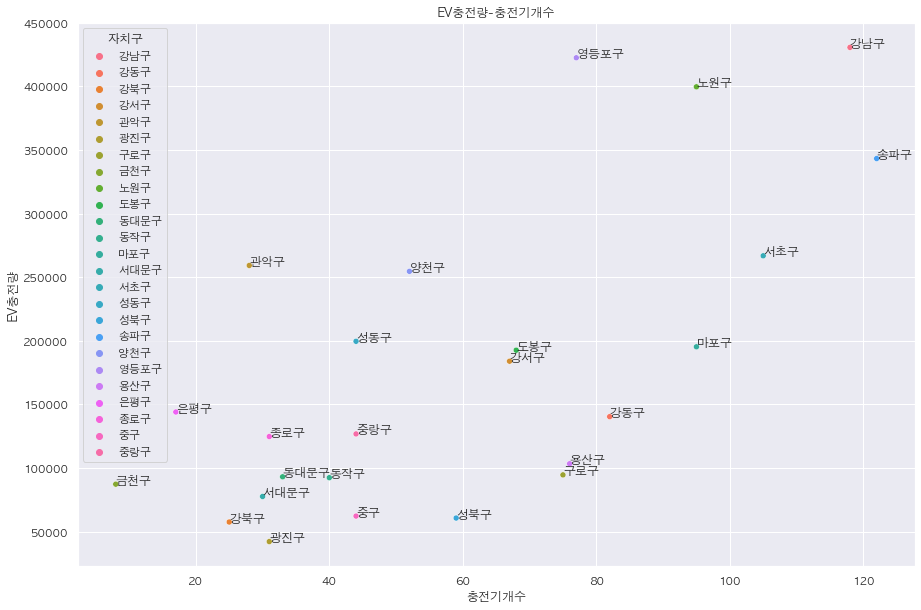

In [272]:
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-충전기개수')
plt.xlabel('충전기개수')
plt.ylabel('EV충전량')
sns.scatterplot(x=final_2['충전기개수'].tolist(), y=final_2['사용전력량'].tolist(), hue='자치구', data=final_2)
for i, label in enumerate(final_2['자치구']):
    plt.annotate(label, (final_2['충전기개수'].tolist()[i], final_2['사용전력량'].tolist()[i]))

# 토지용도

## 분석

In [435]:
gu_landtype = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/구별 용도지역.txt', sep='\t')

In [436]:
gu_landtype = gu_landtype.drop(gu_landtype.index[0])
gu_landtype = gu_landtype[['자치구','용도지역총합계','주거지역','상업지역','공업지역','녹지지역']]
gu_landtype = gu_landtype.fillna(0)
gu_landtype['공업지역'] = gu_landtype['공업지역'].replace('-',0)
gu_landtype['용도지역총합계']=gu_landtype['용도지역총합계'].apply(lambda x: str(x).replace(',',''))
gu_landtype['주거지역']=gu_landtype['주거지역'].apply(lambda x: str(x).replace(',',''))
gu_landtype['상업지역']=gu_landtype['상업지역'].apply(lambda x: str(x).replace(',',''))
gu_landtype['공업지역']=gu_landtype['공업지역'].apply(lambda x: str(x).replace(',',''))
gu_landtype['녹지지역']=gu_landtype['녹지지역'].apply(lambda x: str(x).replace(',',''))

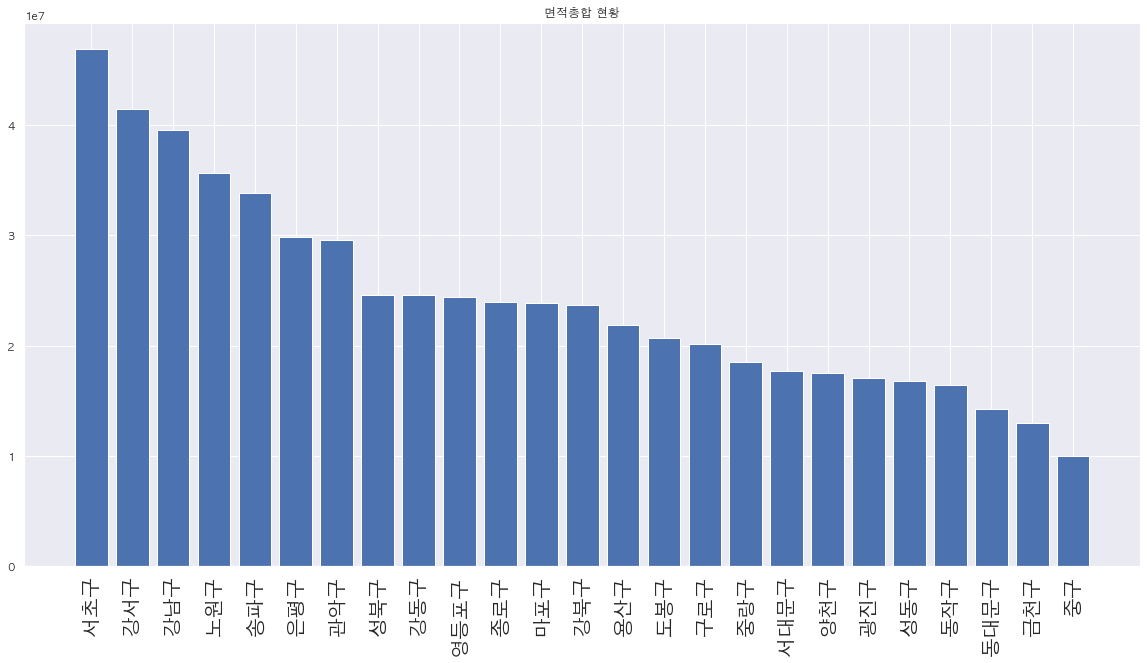

In [437]:
gu_landtype = gu_landtype.astype({'용도지역총합계':'float'})
gu_landtype = gu_landtype.sort_values(by = '용도지역총합계', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_landtype))
y = gu_landtype['용도지역총합계'].tolist()
plt.title('면적총합 현황')
plt.bar(x, y)
plt.xticks(x, gu_landtype['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

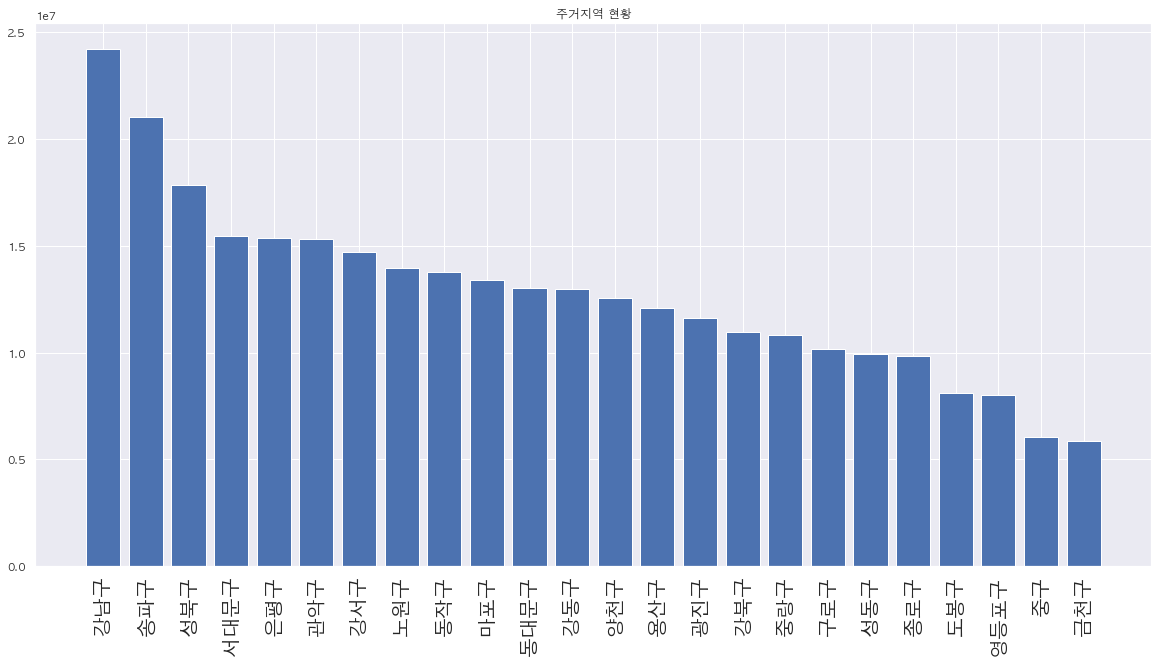

In [438]:
gu_landtype = gu_landtype.astype({'주거지역':'float'})
gu_landtype = gu_landtype.drop(gu_landtype.index[0])
gu_landtype = gu_landtype.sort_values(by = '주거지역', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_landtype))
y = gu_landtype['주거지역'].tolist()
plt.title('주거지역 현황')
plt.bar(x, y)
plt.xticks(x, gu_landtype['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

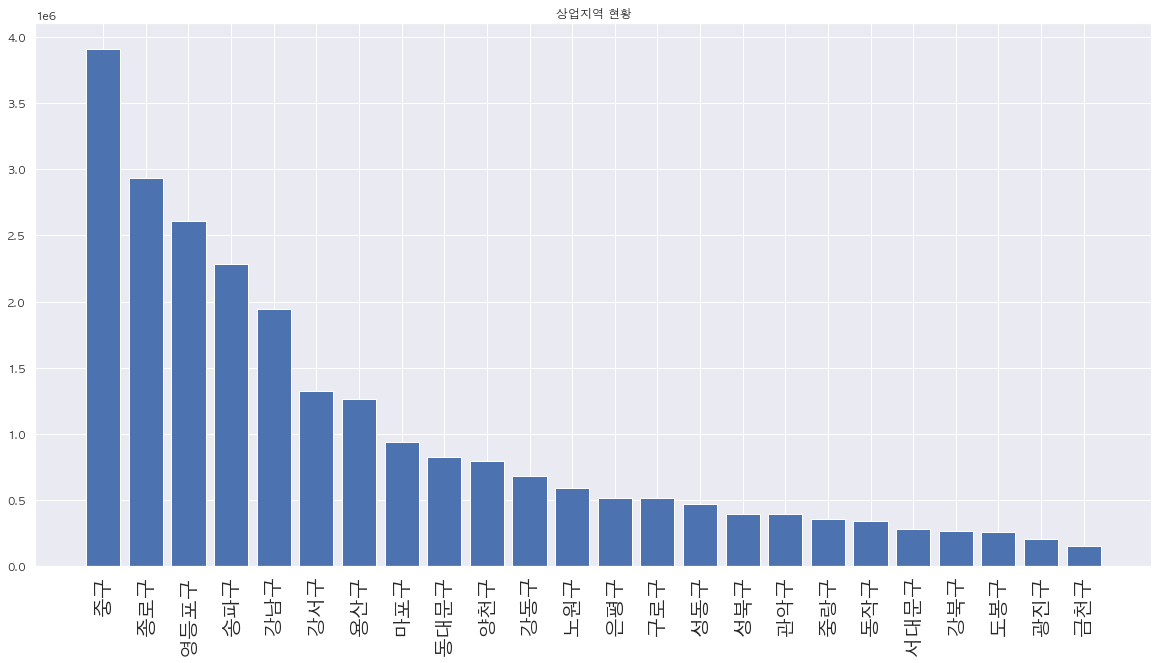

In [439]:
gu_landtype = gu_landtype.astype({'상업지역':'float'})
gu_landtype = gu_landtype.sort_values(by = '상업지역', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_landtype))
y = gu_landtype['상업지역'].tolist()
plt.title('상업지역 현황')
plt.bar(x, y)
plt.xticks(x, gu_landtype['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

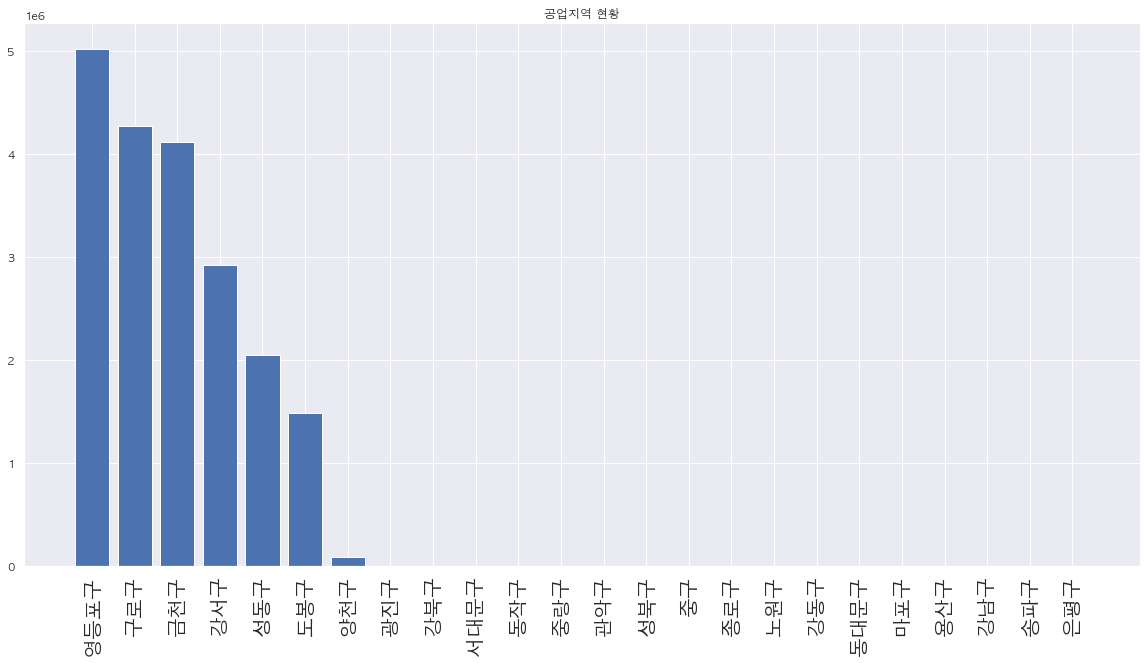

In [440]:
gu_landtype = gu_landtype.astype({'공업지역':'float'})
gu_landtype = gu_landtype.sort_values(by = '공업지역', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_landtype))
y = gu_landtype['공업지역'].tolist()
plt.title('공업지역 현황')
plt.bar(x, y)
plt.xticks(x, gu_landtype['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

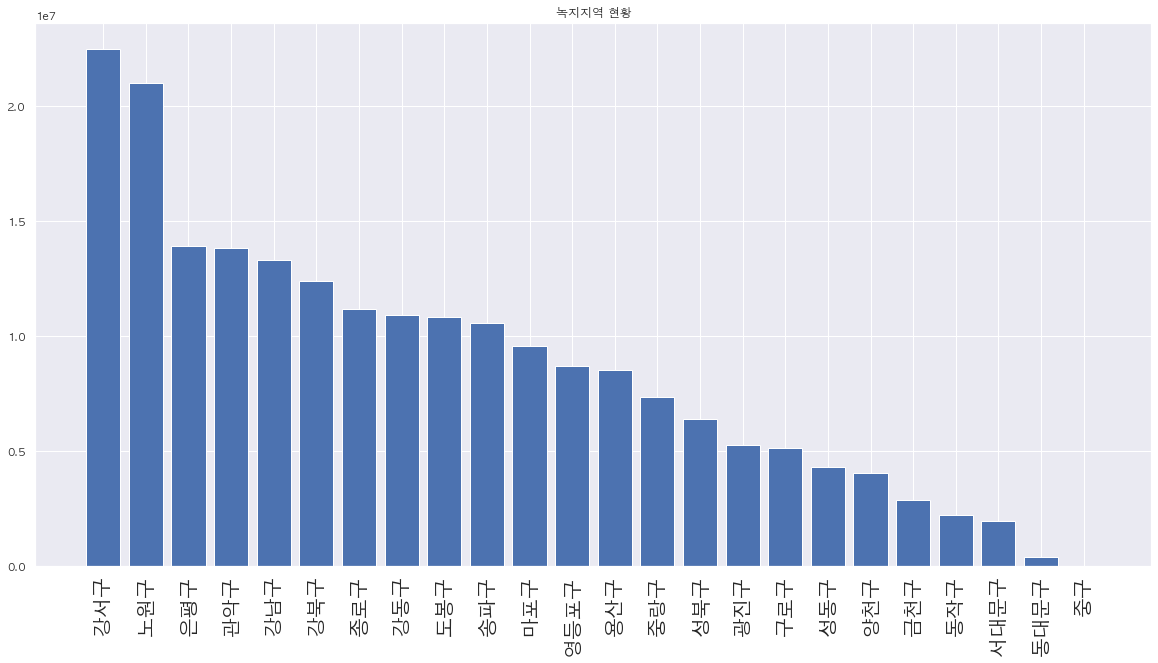

In [441]:
gu_landtype = gu_landtype.astype({'녹지지역':'float'})
gu_landtype = gu_landtype.sort_values(by = '녹지지역', ascending=False)

plt.figure(figsize=(20,10))
x = np.arange(len(gu_landtype))
y = gu_landtype['녹지지역'].tolist()
plt.title('녹지지역 현황')
plt.bar(x, y)
plt.xticks(x, gu_landtype['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

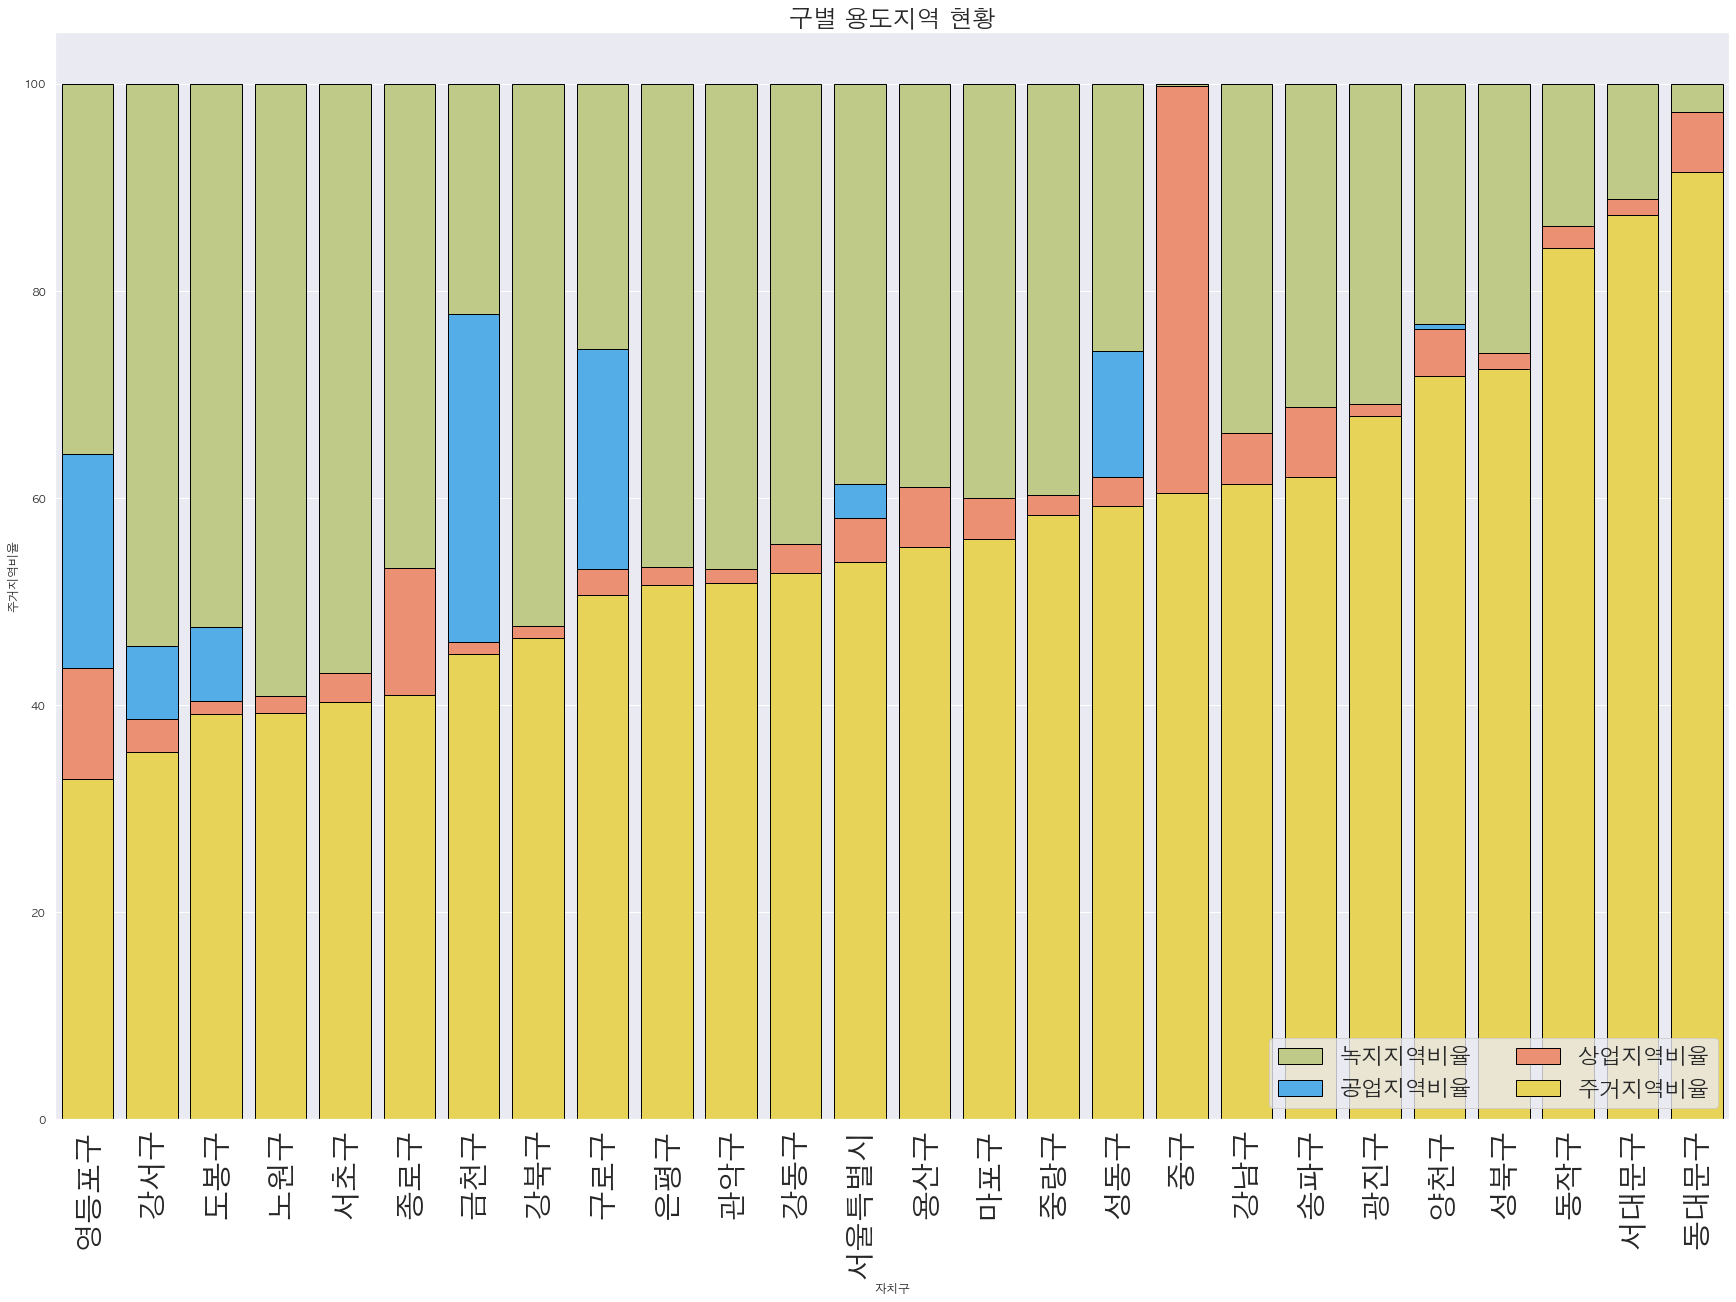

In [442]:
gu_landtype = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/구별 용도지역.txt', sep='\t')

gu_landtype = gu_landtype[['자치구','용도지역총합계','주거지역','상업지역','공업지역','녹지지역']]
gu_landtype = gu_landtype.fillna(0)
gu_landtype['공업지역'] = gu_landtype['공업지역'].replace('-',0)
gu_landtype['용도지역총합계']=gu_landtype['용도지역총합계'].apply(lambda x: str(x).replace(',',''))
gu_landtype['주거지역']=gu_landtype['주거지역'].apply(lambda x: str(x).replace(',',''))
gu_landtype['상업지역']=gu_landtype['상업지역'].apply(lambda x: str(x).replace(',',''))
gu_landtype['공업지역']=gu_landtype['공업지역'].apply(lambda x: str(x).replace(',',''))
gu_landtype['녹지지역']=gu_landtype['녹지지역'].apply(lambda x: str(x).replace(',',''))

for i in range(len(gu_landtype)):
    gu_landtype.loc[i,'주거지역비율'] = int(gu_landtype.loc[i,'주거지역']) / int(gu_landtype.loc[i,'용도지역총합계']) * 100
    gu_landtype.loc[i,'상업지역비율'] = int(gu_landtype.loc[i,'상업지역']) / int(gu_landtype.loc[i,'용도지역총합계']) * 100
    gu_landtype.loc[i,'공업지역비율'] = int(gu_landtype.loc[i,'공업지역']) / int(gu_landtype.loc[i,'용도지역총합계']) * 100
    gu_landtype.loc[i,'녹지지역비율'] = int(gu_landtype.loc[i,'녹지지역']) / int(gu_landtype.loc[i,'용도지역총합계']) * 100
    
for i in range(len(gu_landtype)):
    gu_landtype.loc[i,'상업지역비율'] = gu_landtype.loc[i,'주거지역비율'] + gu_landtype.loc[i,'상업지역비율']
    gu_landtype.loc[i,'공업지역비율'] = gu_landtype.loc[i, '상업지역비율'] + gu_landtype.loc[i, '공업지역비율']
    gu_landtype.loc[i,'녹지지역비율'] = gu_landtype.loc[i, '공업지역비율'] + gu_landtype.loc[i, '녹지지역비율']

from matplotlib import rc
gu_landtype = gu_landtype.sort_values(by='주거지역비율')
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale = 2)
plt.xticks(rotation = 90, fontsize=30)
plt.title('구별 용도지역 현황')

landtypeplot_green = sns.barplot(x = '자치구', y = '녹지지역비율', data = gu_landtype, label = '녹지지역비율', color = '#C6D57E', edgecolor = 'black')
landtypeplot_indus = sns.barplot(x = '자치구', y = '공업지역비율', data = gu_landtype, label = '공업지역비율', color='#3DB2FF', edgecolor = 'black')
landtypeplot_comme = sns.barplot(x = '자치구', y = '상업지역비율', data = gu_landtype, label = '상업지역비율', color='#FF865E', edgecolor = 'black')
landtypeplot_dwell = sns.barplot(x = '자치구', y = '주거지역비율', data = gu_landtype, label = '주거지역비율', color='#FEE440', edgecolor = 'black')
rc('font', family='AppleGothic')
ax.legend(ncol=2, loc="lower right", frameon=True)

## 토지용도 vs EV충전량

In [443]:
result_3 = pd.merge(ev_tot, gu_landtype[['용도지역총합계','주거지역','상업지역','공업지역','녹지지역','자치구']], on='자치구')

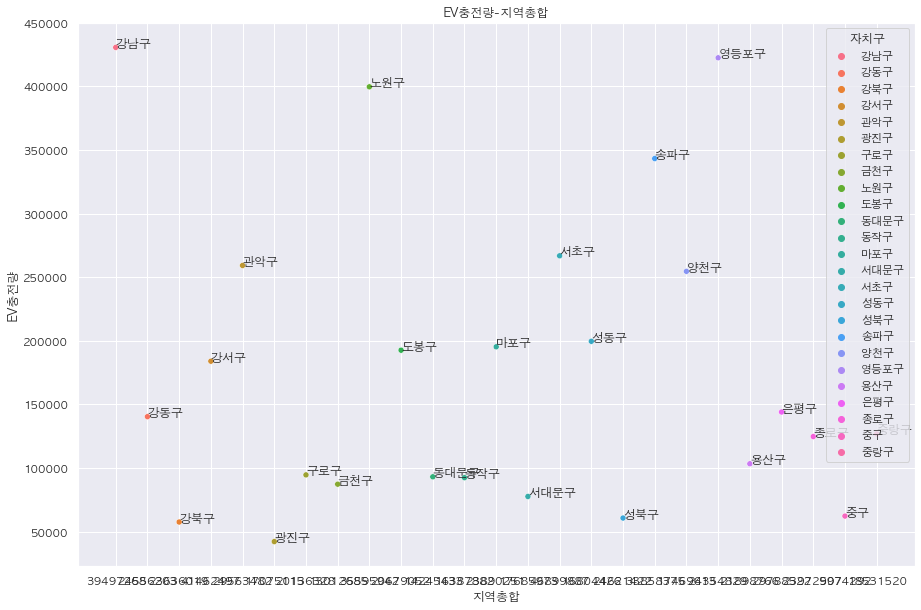

In [444]:
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-지역총합')
plt.xlabel('지역총합')
plt.ylabel('EV충전량')
sns.scatterplot(x=result_3['용도지역총합계'].tolist(), y=result_3['사용전력량'].tolist(), hue='자치구', data=result_3)
for i, label in enumerate(result_3['자치구']):
    plt.annotate(label, (result_3['용도지역총합계'].tolist()[i], result_3['사용전력량'].tolist()[i]))

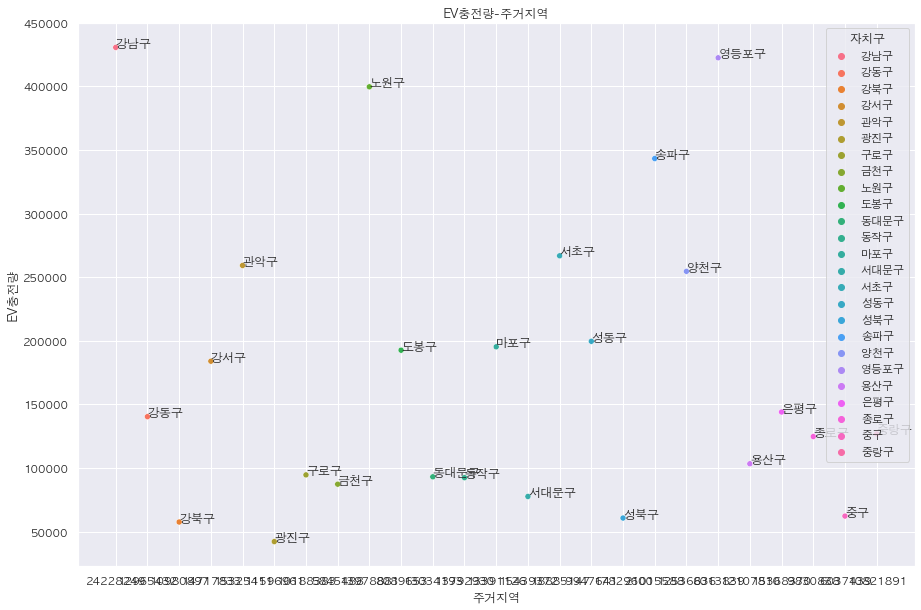

In [445]:
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-주거지역')
plt.xlabel('주거지역')
plt.ylabel('EV충전량')
sns.scatterplot(x=result_3['주거지역'].tolist(), y=result_3['사용전력량'].tolist(), hue='자치구', data=result_3)
for i, label in enumerate(result_3['자치구']):
    plt.annotate(label, (result_3['주거지역'].tolist()[i], result_3['사용전력량'].tolist()[i]))

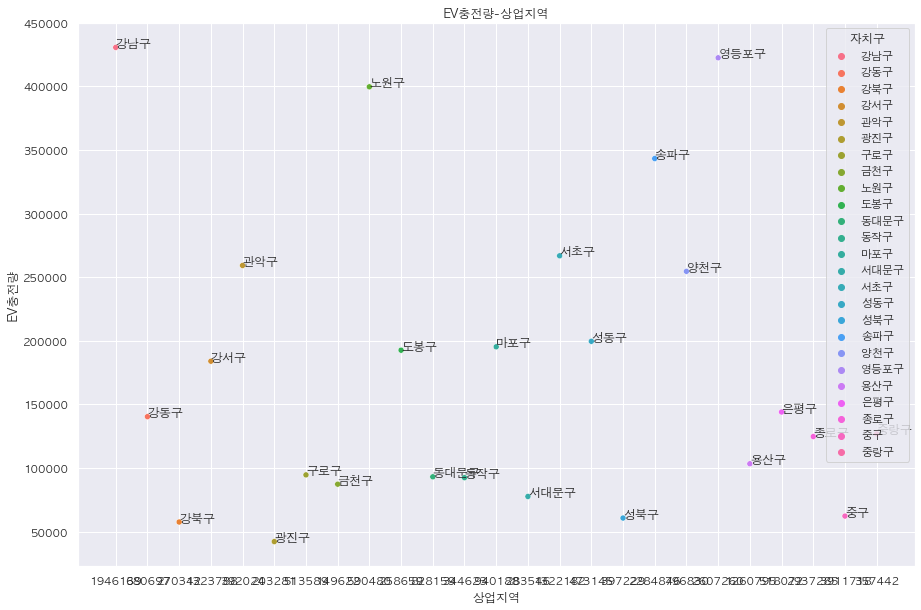

In [446]:
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-상업지역')
plt.xlabel('상업지역')
plt.ylabel('EV충전량')
sns.scatterplot(x=result_3['상업지역'].tolist(), y=result_3['사용전력량'].tolist(), hue='자치구', data=result_3)
for i, label in enumerate(result_3['자치구']):
    plt.annotate(label, (result_3['상업지역'].tolist()[i], result_3['사용전력량'].tolist()[i]))

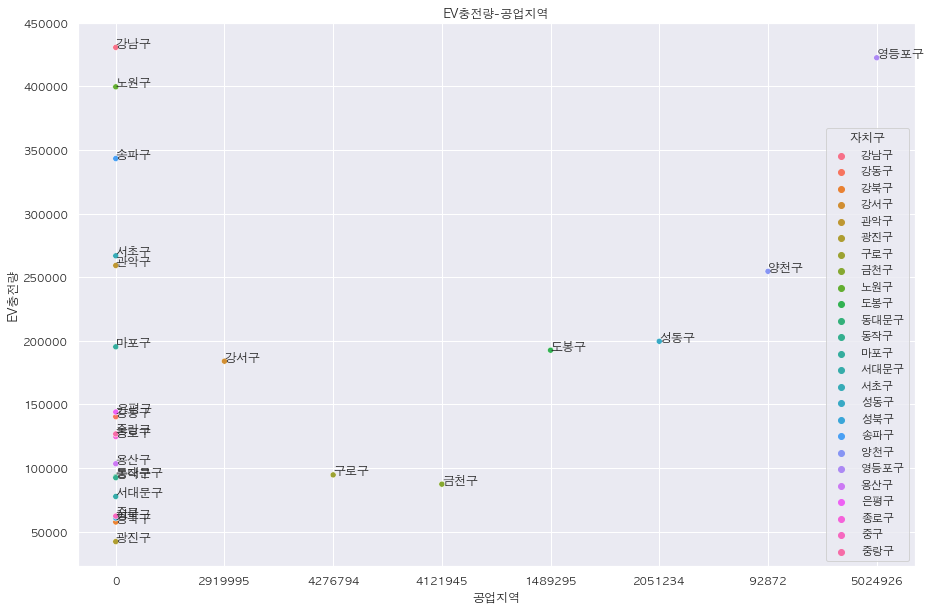

In [447]:
# 아무런 상관관계가 없다.
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-공업지역')
plt.xlabel('공업지역')
plt.ylabel('EV충전량')
sns.scatterplot(x=result_3['공업지역'].tolist(), y=result_3['사용전력량'].tolist(), hue='자치구', data=result_3)
for i, label in enumerate(result_3['자치구']):
    plt.annotate(label, (result_3['공업지역'].tolist()[i], result_3['사용전력량'].tolist()[i]))

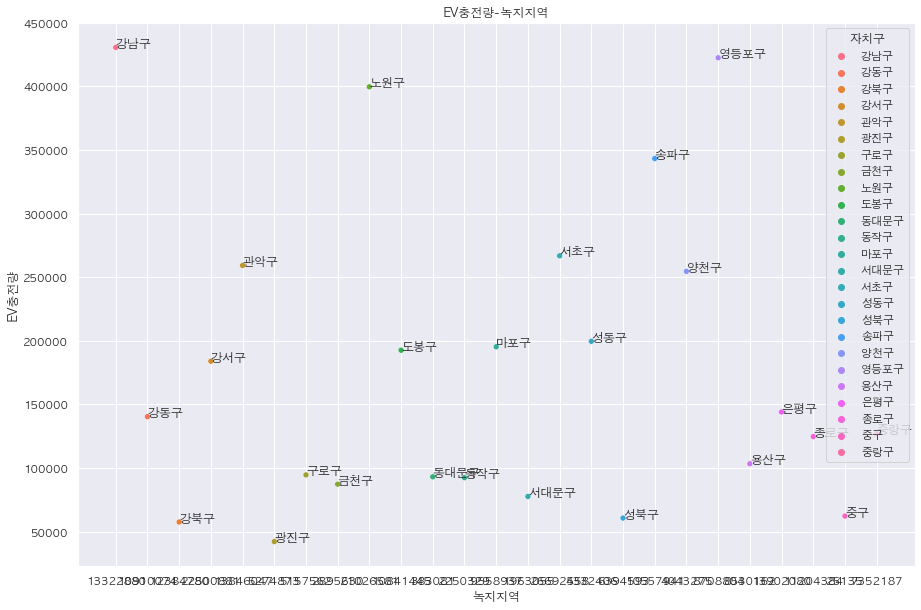

In [448]:
# 상관관계를 띄지 않아 보인다.
sns.set(rc = {'figure.figsize':(15,10)})
plt.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')
colors = np.random.rand(25)
plt.title('EV충전량-녹지지역')
plt.xlabel('녹지지역')
plt.ylabel('EV충전량')
sns.scatterplot(x=result_3['녹지지역'].tolist(), y=result_3['사용전력량'].tolist(), hue='자치구', data=result_3)
for i, label in enumerate(result_3['자치구']):
    plt.annotate(label, (result_3['녹지지역'].tolist()[i], result_3['사용전력량'].tolist()[i]))

# 세대수

## 분석

In [449]:
Seoul_sede = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/Seoul_population_Sede.csv',thousands=',')
Seoul_sede['Sede'] = Seoul_sede['Sede'].apply(lambda x : float(x))
Seoul_sede = Seoul_sede.rename(columns={'dong':'자치구'})

In [450]:
Seoul_sede = pd.merge(Seoul_sede, gu_evcar[['자치구','전기자동차등록대수']],on='자치구')
Seoul_sede.head()

,자치구,Sede,전기자동차등록대수
0,종로구,73525.0,281.0
1,중구,62897.0,707.0
2,용산구,111650.0,475.0
3,성동구,134542.0,954.0
4,광진구,166957.0,300.0


In [451]:
result_4 = pd.merge(Seoul_sede, ev_tot,on='자치구')
result_4['세대수 대비 전기자동차 등록대수'] = Seoul_sede['전기자동차등록대수'] / Seoul_sede['Sede']
result_4.head()

,자치구,Sede,전기자동차등록대수,충전기 개수,충전소요시간,사용전력량,세대수 대비 전기자동차 등록대수
0,종로구,73525.0,281.0,7,3908.383333,124798.58,0.003822
1,중구,62897.0,707.0,11,2318.216667,62307.38,0.011241
2,용산구,111650.0,475.0,6,3587.433333,103412.62,0.004254
3,성동구,134542.0,954.0,17,9335.816667,199647.45,0.007091
4,광진구,166957.0,300.0,1,1446.833333,42251.55,0.001797


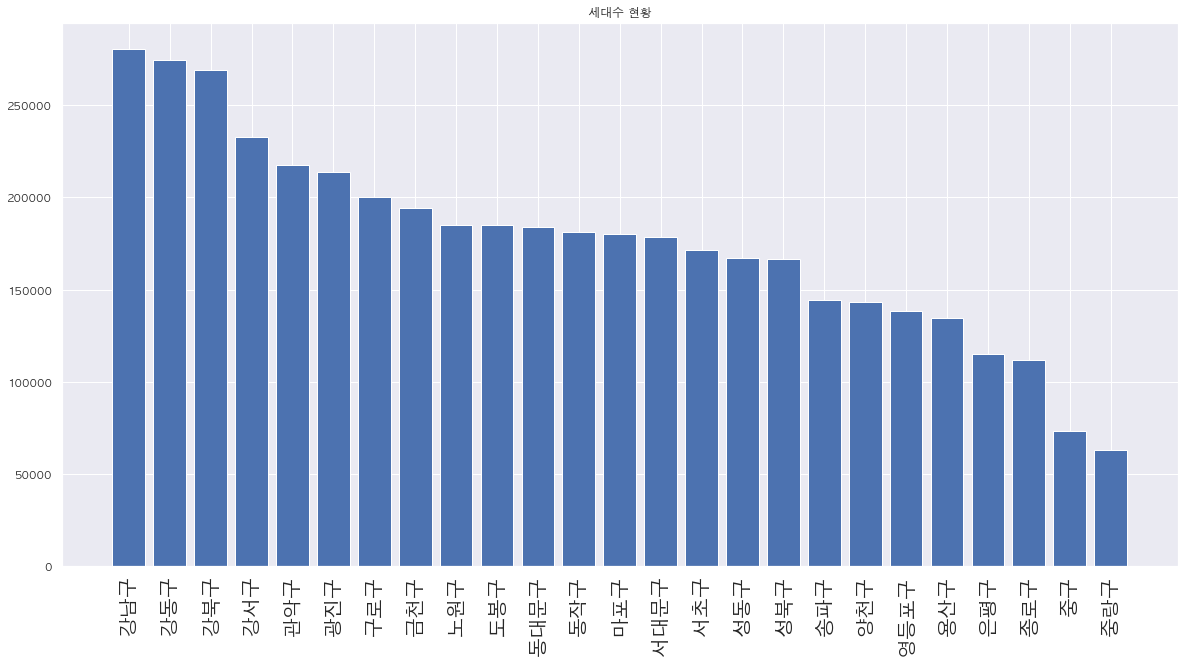

In [452]:
result_4 = result_4.sort_values(by='Sede', ascending=False)
plt.figure(figsize=(20,10))
x = np.arange(len(result_4))
y = result_4['Sede'].tolist()
plt.title('세대수 현황')
plt.bar(x, y)
plt.xticks(x, result_4['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

## 세대수 vs EV충전량

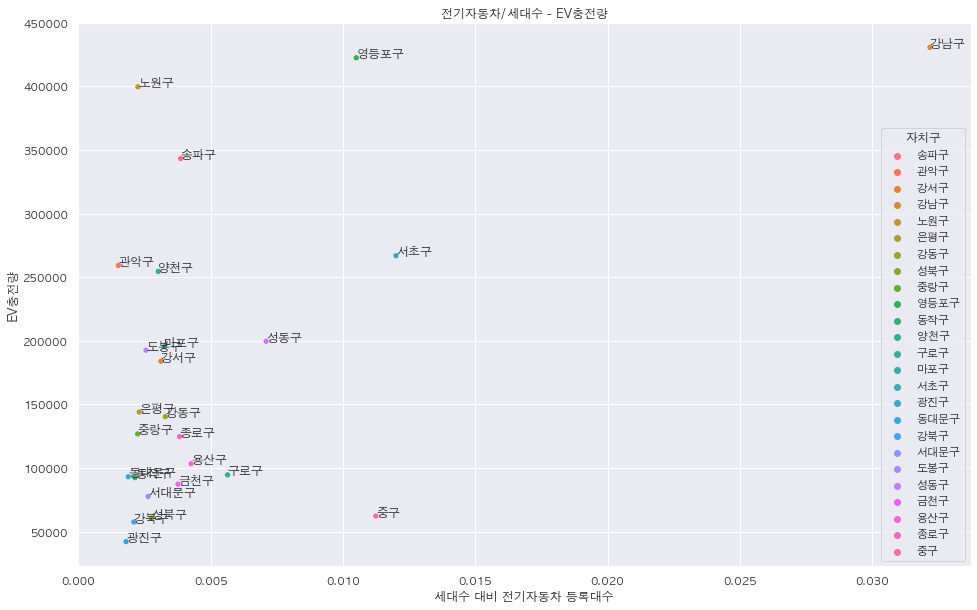

In [476]:
colors = np.random.rand(25)
sns.set(rc = {'figure.figsize':(16,10)})
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()

plt.title('전기자동차/세대수 - EV충전량')
plt.xlabel('세대수 대비 전기자동차 등록대수')
plt.ylabel('EV충전량')

sns.scatterplot(y=result_4['사용전력량'].tolist() , x=result_4['세대수 대비 전기자동차 등록대수'].tolist(), hue='자치구', data=result_4)

for i, label in enumerate(result_4['자치구']):
    plt.annotate(label, (result_4['세대수 대비 전기자동차 등록대수'].tolist()[i], result_4['사용전력량'].tolist()[i]))

# 종합소득금액

## 분석

In [454]:
tax = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/all_tax.csv')
result_5 = pd.merge(tax, ev_tot[['자치구','사용전력량']], on='자치구')
result_5.head()

,자치구,종합소득금액,사용전력량
0,강남구,14162904,430598.40
1,강동구,2142585,140422.50
2,강북구,896816,57633.84
3,강서구,2520862,184012.83
4,관악구,1844461,259232.85


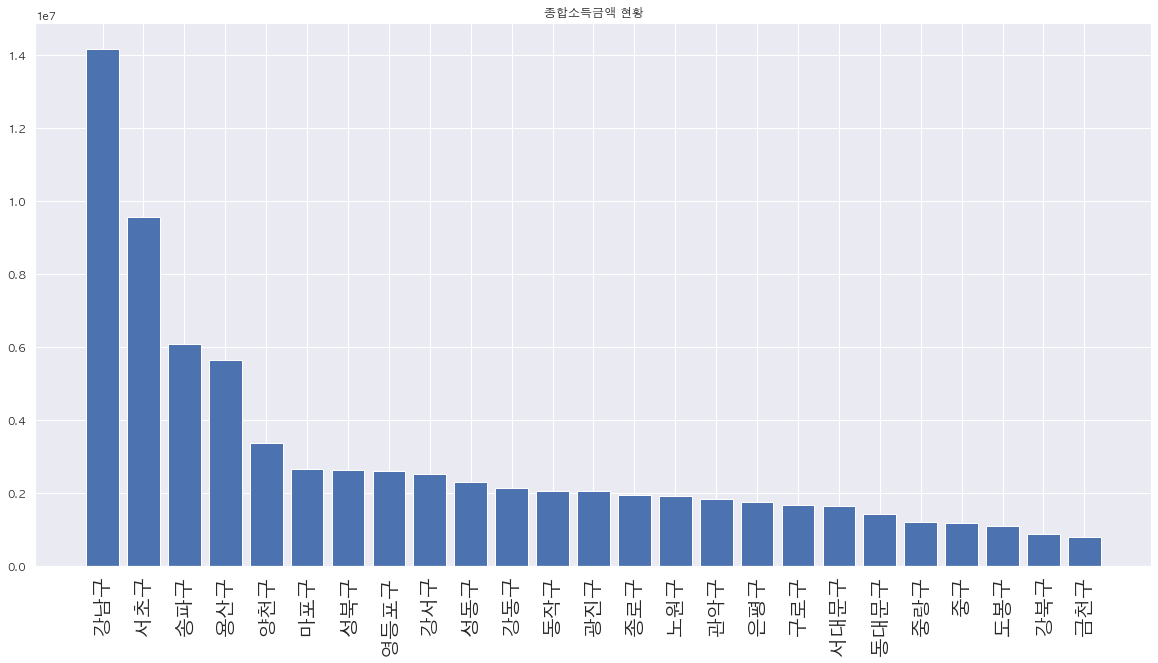

In [456]:
result_5 = result_5.sort_values(by='종합소득금액', ascending=False)
plt.figure(figsize=(20,10))
x = np.arange(len(result_5))
y = result_5['종합소득금액'].tolist()
plt.title('종합소득금액 현황')
plt.bar(x, y)
plt.xticks(x, result_5['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

## 종합소득금액 vs EV충전량

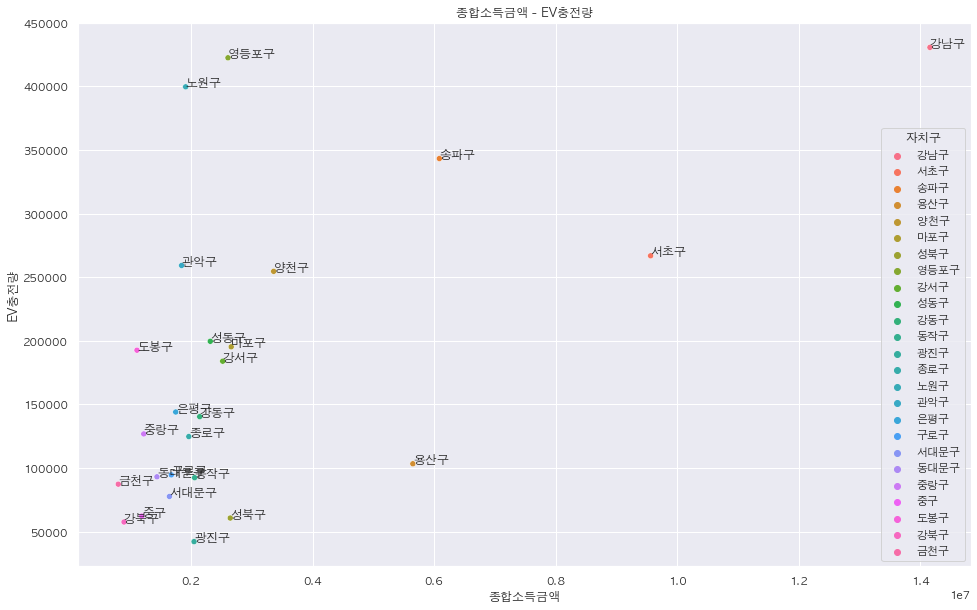

In [478]:
colors = np.random.rand(25)
sns.set(rc = {'figure.figsize':(16,10)})
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()

plt.title('종합소득금액 - EV충전량')
plt.xlabel('종합소득금액')
plt.ylabel('EV충전량')

sns.scatterplot(y=result_5['사용전력량'].tolist() , x=result_5['종합소득금액'].tolist(), hue='자치구', data=result_5)

for i, label in enumerate(result_5['자치구']):
    plt.annotate(label, (result_5['종합소득금액'].tolist()[i], result_5['사용전력량'].tolist()[i]))

# 주차장면적

## 분석

In [458]:
dong_park = pd.read_csv('/Users/minkyuramen/Desktop/데멘토/분석데이터/구별주차장.csv')

In [459]:
dong_park_big = dong_park[['자치구','동','건축물부설.1','건축물부설.2','건축물부설.4','건축물부설.6']]
dong_park_big = dong_park_big.drop([dong_park_big.index[0],dong_park_big.index[1]])
dong_park_big.reset_index(inplace=True)

In [460]:
park_kind = dong_park[['자치구','동','합계.1','노상.1','노외.1','건축물부설.1']]
park_kind.reset_index(inplace=True)
park_kind.rename(columns = {'합계.1':'합계', '노상.1':'노상', '노외.1':'노외', '건축물부설.1':'건축물부설' }, inplace = True)

In [461]:
k = []
for i in range(1,len(park_kind)):
    if park_kind.loc[i,'자치구'] != park_kind.loc[i-1,'자치구']:
        k.append(i)
park_gu_kind = park_kind.loc[k]

In [462]:
park_gu_kind['합계']=park_gu_kind['합계'].apply(lambda x: str(x).replace(',',''))
park_gu_kind['노상']=park_gu_kind['노상'].apply(lambda x: str(x).replace(',',''))
park_gu_kind['노외']=park_gu_kind['노외'].apply(lambda x: str(x).replace(',',''))
park_gu_kind['건축물부설']=park_gu_kind['건축물부설'].apply(lambda x: str(x).replace(',',''))

In [463]:
park_gu_kind['노상 비율'] = park_gu_kind['노상'].apply(lambda x : int(x))/park_gu_kind['합계'].apply(lambda x : int(x))
park_gu_kind['노외 비율'] = park_gu_kind['노외'].apply(lambda x : int(x))/park_gu_kind['합계'].apply(lambda x : int(x))
park_gu_kind['건축물부설 비율'] = park_gu_kind['건축물부설'].apply(lambda x : int(x))/park_gu_kind['합계'].apply(lambda x : int(x))

In [465]:
park_gu_kind=park_gu_kind.reset_index()
for i in range(len(park_gu_kind)):
    park_gu_kind.loc[i, '노외 비율'] = park_gu_kind.loc[i,'노상 비율'] + park_gu_kind.loc[i,'노외 비율']
    park_gu_kind.loc[i, '건축물부설 비율'] = park_gu_kind.loc[i, '노외 비율'] + park_gu_kind.loc[i, '건축물부설 비율']
    
park_gu_kind.head()

,level_0,index,자치구,동,합계,노상,노외,건축물부설,노상 비율,노외 비율,건축물부설 비율
0,2,2,합계,합계,4327614,112177,100489,4114948,0.025921,0.049142,1.0
1,3,3,종로구,소계,95048,2136,6321,86591,0.022473,0.088976,1.0
2,21,21,중구,소계,107738,1283,5971,100484,0.011909,0.067330,1.0
3,37,37,용산구,소계,116870,3712,3478,109680,0.031762,0.061521,1.0
4,54,54,성동구,소계,133161,4749,3504,124908,0.035664,0.061978,1.0


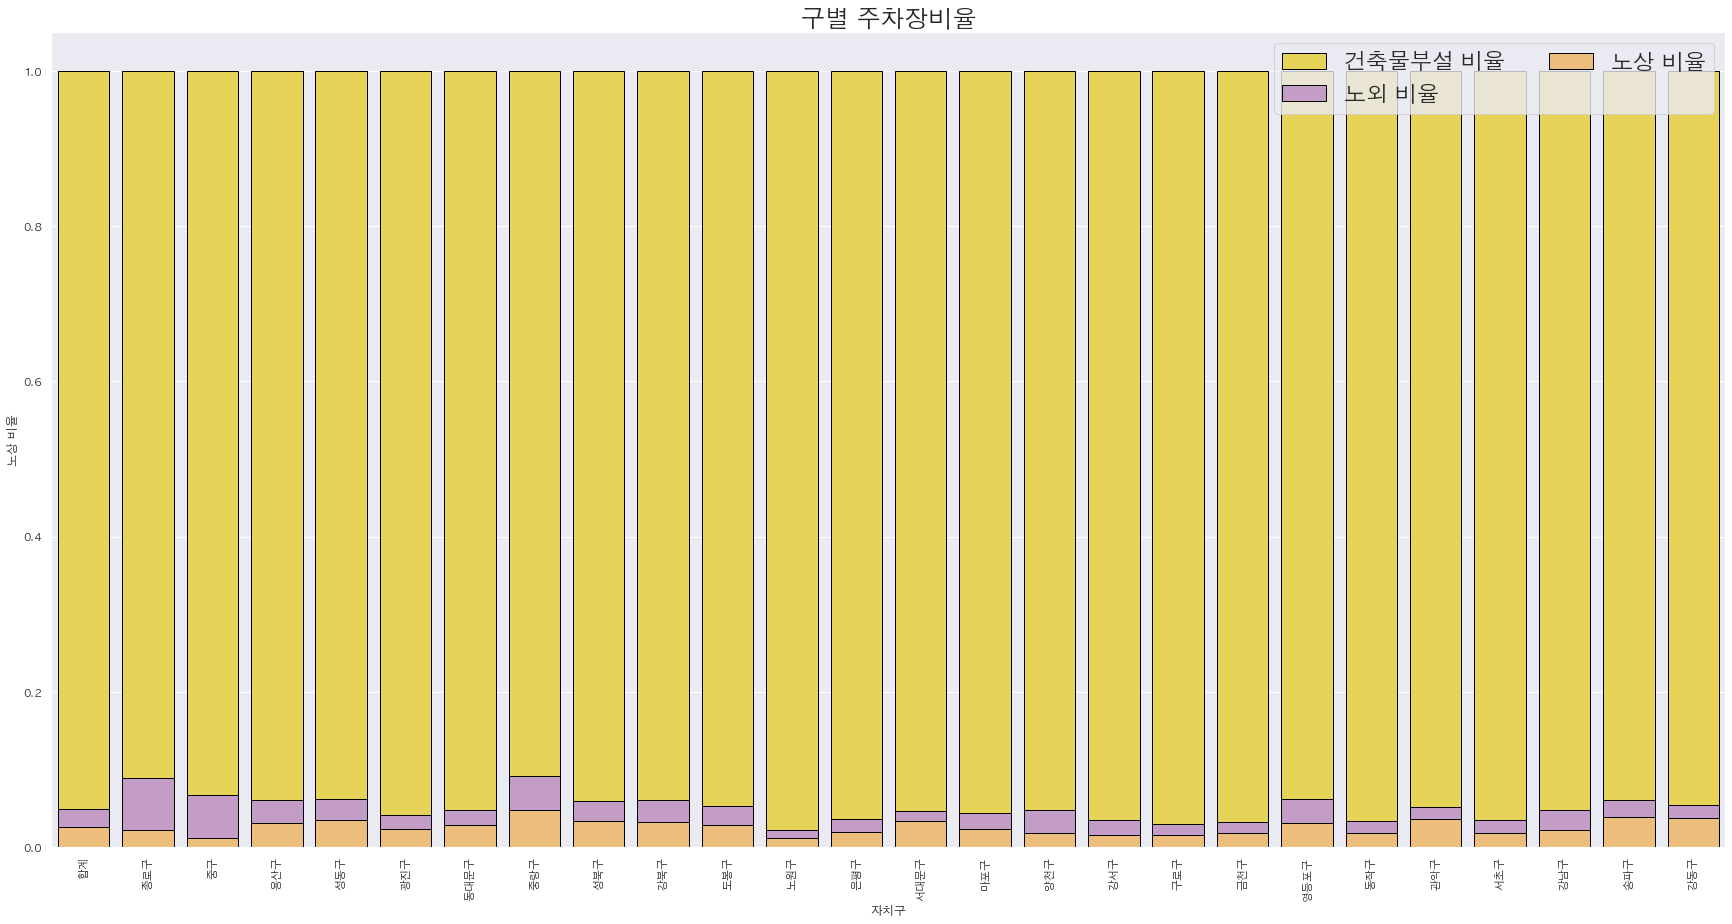

In [466]:
# 노상이나 노외 주차장 비율을 무시 가능할 정도로 건출물부설비율이 전 자치구들 중에서 압도적으로 많다.
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(30, 15))
sns.set(font_scale = 2)
plt.xticks(rotation = 90)
plt.title('구별 주차장비율')
park_gu_kind_build = sns.barplot(x = '자치구', y = '건축물부설 비율', data = park_gu_kind, color = '#FEE440', label = '건축물부설 비율', edgecolor = 'black')
park_gu_kind_in = sns.barplot(x = '자치구', y = '노외 비율', data = park_gu_kind, color = '#C996CC', label = '노외 비율', edgecolor = 'black')
park_gu_kind_out = sns.barplot(x = '자치구', y = '노상 비율', data = park_gu_kind, color = '#FFC069', label = '노상 비율', edgecolor = 'black')
rc('font', family='AppleGothic')
ax.legend(ncol=2, loc="upper right", frameon=True)

In [464]:
result_6 = pd.merge(park_gu_kind, ev_tot[['자치구','사용전력량']], on='자치구')

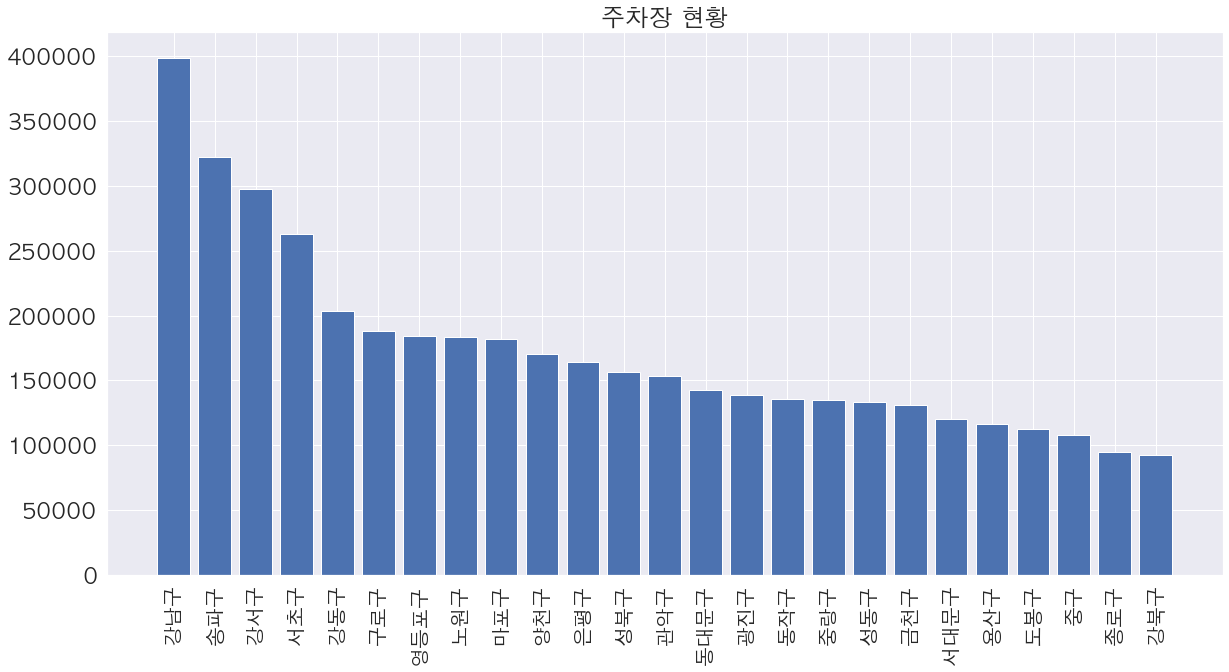

In [468]:
result_6 = result_6.astype({'합계':'float'})
result_6 = result_6.sort_values(by='합계', ascending=False)
plt.figure(figsize=(20,10))
x = np.arange(len(result_6))
y = result_6['합계'].tolist()
plt.title('주차장 현황')
plt.bar(x, y)
plt.xticks(x, result_6['자치구'])
plt.xticks(rotation = 90, fontsize=20)
plt.show()

## 주차장면적 vs EV충전량

In [530]:
result_6 = result_6.rename(columns={'합계':'주차장면적 총합'})

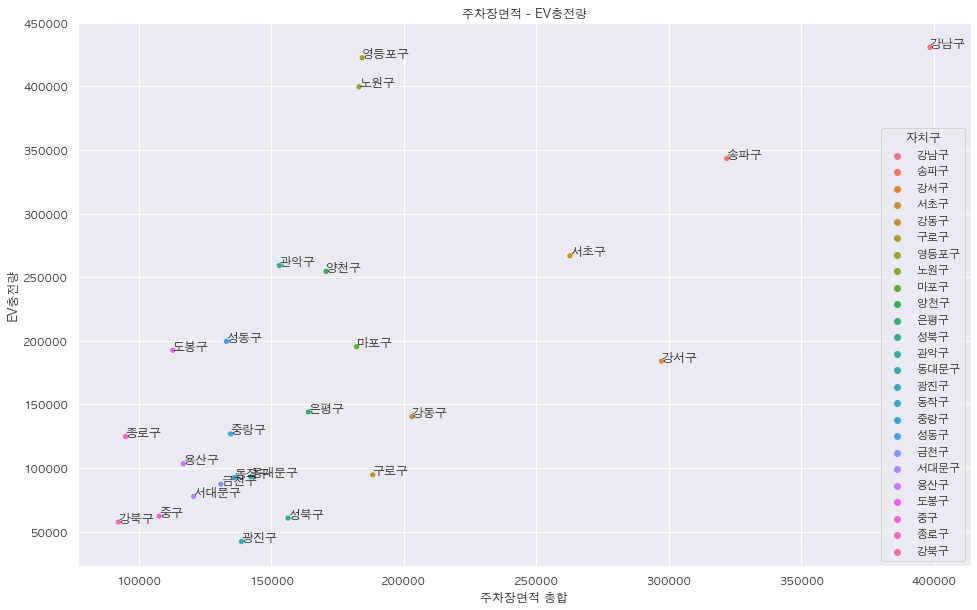

In [533]:
colors = np.random.rand(25)
sns.set(rc = {'figure.figsize':(16,10)})
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()

plt.title('주차장면적 - EV충전량')
plt.xlabel('주차장면적 총합')
plt.ylabel('EV충전량')

sns.scatterplot(y=result_6['사용전력량'].tolist() , x=result_6['주차장면적 총합'].tolist(), hue='자치구', data=result_6)

for i, label in enumerate(result_6['자치구']):
    plt.annotate(label, (result_6['주차장면적 총합'].tolist()[i], result_6['사용전력량'].tolist()[i]))

# 다변량분석

## 히트맵

In [545]:
final_1.head()

,자치구,충전소요시간,사용전력량,전기자동차등록대수
0,강남구,16749.666667,430598.40,7490.0
1,강동구,4235.783333,140422.50,657.0
2,강북구,1536.666667,57633.84,302.0
3,강서구,6172.216667,184012.83,839.0
4,관악구,8642.000000,259232.85,413.0


In [546]:
final_2.head()

,자치구,충전기 개수,충전소요시간,사용전력량,충전기개수
0,강남구,31,16749.666667,430598.40,118.0
1,강동구,7,4235.783333,140422.50,82.0
2,강북구,7,1536.666667,57633.84,25.0
3,강서구,13,6172.216667,184012.83,67.0
4,관악구,8,8642.000000,259232.85,28.0


In [512]:
result_3.head()

,자치구,충전기 개수,충전소요시간,사용전력량,용도지역총합계,주거지역,상업지역,공업지역,녹지지역
0,강남구,31,16749.666667,430598.40,39497268,24228249,1946139,0,13322880
1,강동구,7,4235.783333,140422.50,24556203,12965432,680697,0,10910074
2,강북구,7,1536.666667,57633.84,23636019,10980897,270342,0,12384780
3,강서구,13,6172.216667,184012.83,41462497,14717833,1323788,2919995,22500881
4,관악구,8,8642.000000,259232.85,29563482,15325411,392024,0,13846047


In [513]:
result_4.head()

,자치구,Sede,전기자동차등록대수,충전기 개수,충전소요시간,사용전력량,세대수 대비 전기자동차 등록대수
23,송파구,280707.0,1084.0,21,10385.466667,343259.66,0.003862
20,관악구,274565.0,413.0,8,8642.000000,259232.85,0.001504
15,강서구,269276.0,839.0,13,6172.216667,184012.83,0.003116
22,강남구,232707.0,7490.0,31,16749.666667,430598.40,0.032186
10,노원구,217322.0,488.0,14,16125.800000,399627.86,0.002246


In [514]:
result_5.head()

,자치구,종합소득금액,사용전력량
0,강남구,14162904,430598.40
14,서초구,9564642,266830.80
17,송파구,6087546,343259.66
20,용산구,5650993,103412.62
18,양천구,3359932,254622.34


In [515]:
result_6.head()

,index,자치구,동,합계,노상,노외,건축물부설,노상 비율,노외 비율,건축물부설 비율,사용전력량
22,383,강남구,소계,398603.0,8976,9938,379689,0.022519,0.024932,0.952549,430598.40
23,406,송파구,소계,321938.0,12685,7096,302157,0.039402,0.022042,0.938556,343259.66
15,258,강서구,소계,297275.0,4747,5606,286922,0.015968,0.018858,0.965174,184012.83
21,364,서초구,소계,262735.0,4811,4515,253409,0.018311,0.017185,0.964504,266830.80
24,434,강동구,소계,203140.0,7765,3297,192078,0.038225,0.016230,0.945545,140422.50


In [562]:
col

['전기자동차등록대수',
 '사용전력량',
 '충전기개수',
 '용도지역총합계',
 '주거지역',
 '상업지역',
 '공업지역',
 '녹지지역',
 '세대수 대비 전기자동차 등록대수',
 '종합소득금액',
 '주차장면적 총합']

In [649]:
heat=[]

In [650]:
heat = pd.merge(final_1[['자치구','전기자동차등록대수','사용전력량']], final_2[['자치구','충전기개수']], on='자치구')
heat = pd.merge(heat, result_3[['자치구','용도지역총합계','주거지역','상업지역','공업지역','녹지지역']], on='자치구')
heat = pd.merge(heat, result_4[['자치구','세대수 대비 전기자동차 등록대수']], on='자치구')
heat = pd.merge(heat, result_5[['자치구','종합소득금액']], on='자치구')
heat = pd.merge(heat, result_6[['자치구','주차장면적 총합']], on='자치구')

In [651]:
heat.set_index(keys='자치구', inplace=True)

In [568]:
from sklearn import preprocessing
col = heat.columns.tolist()[1:]

x = heat[col].values
standardize_scaler = preprocessing.StandardScaler()

x_scaled = standardize_scaler.fit_transform(x.astype(float))
target_ncharging = pd.DataFrame(x_scaled, columns = col, index = heat.index)
target_ncharging

,사용전력량,충전기개수,용도지역총합계,주거지역,상업지역,공업지역,녹지지역,세대수 대비 전기자동차 등록대수,종합소득금액,주차장면적 총합
자치구,,,,,,,,,,
강남구,2.180918,1.902026,1.675098,2.615362,0.956710,-0.517844,0.596823,4.331872,3.772443,3.086601
강동구,-0.326889,0.748506,0.036442,-0.017145,-0.355714,-0.517844,0.233227,-0.315611,-0.293722,0.411122
강북구,-1.042379,-1.077900,-0.064479,-0.480999,-0.781305,-0.517844,0.455457,-0.507369,-0.715134,-1.105840
강서구,0.049835,0.267873,1.890634,0.392451,0.311253,1.374454,1.979895,-0.342374,-0.165761,1.699633
관악구,0.699914,-0.981774,0.585613,0.534463,-0.655105,-0.517844,0.675662,-0.601496,-0.394570,-0.273588
광진구,-1.175318,-0.885647,-0.784044,-0.337004,-0.850855,-0.517844,-0.615965,-0.554437,-0.325165,-0.469626
구로구,-0.722307,0.524211,-0.448307,-0.666237,-0.529027,2.253726,-0.633643,0.062912,-0.451784,0.208582
금천구,-0.785330,-1.622618,-1.229590,-1.681320,-0.906507,2.153376,-0.974503,-0.238433,-0.747121,-0.576090
노원구,1.913259,1.165055,1.247221,0.219733,-0.449281,-0.517844,1.757726,-0.482300,-0.372043,0.137802


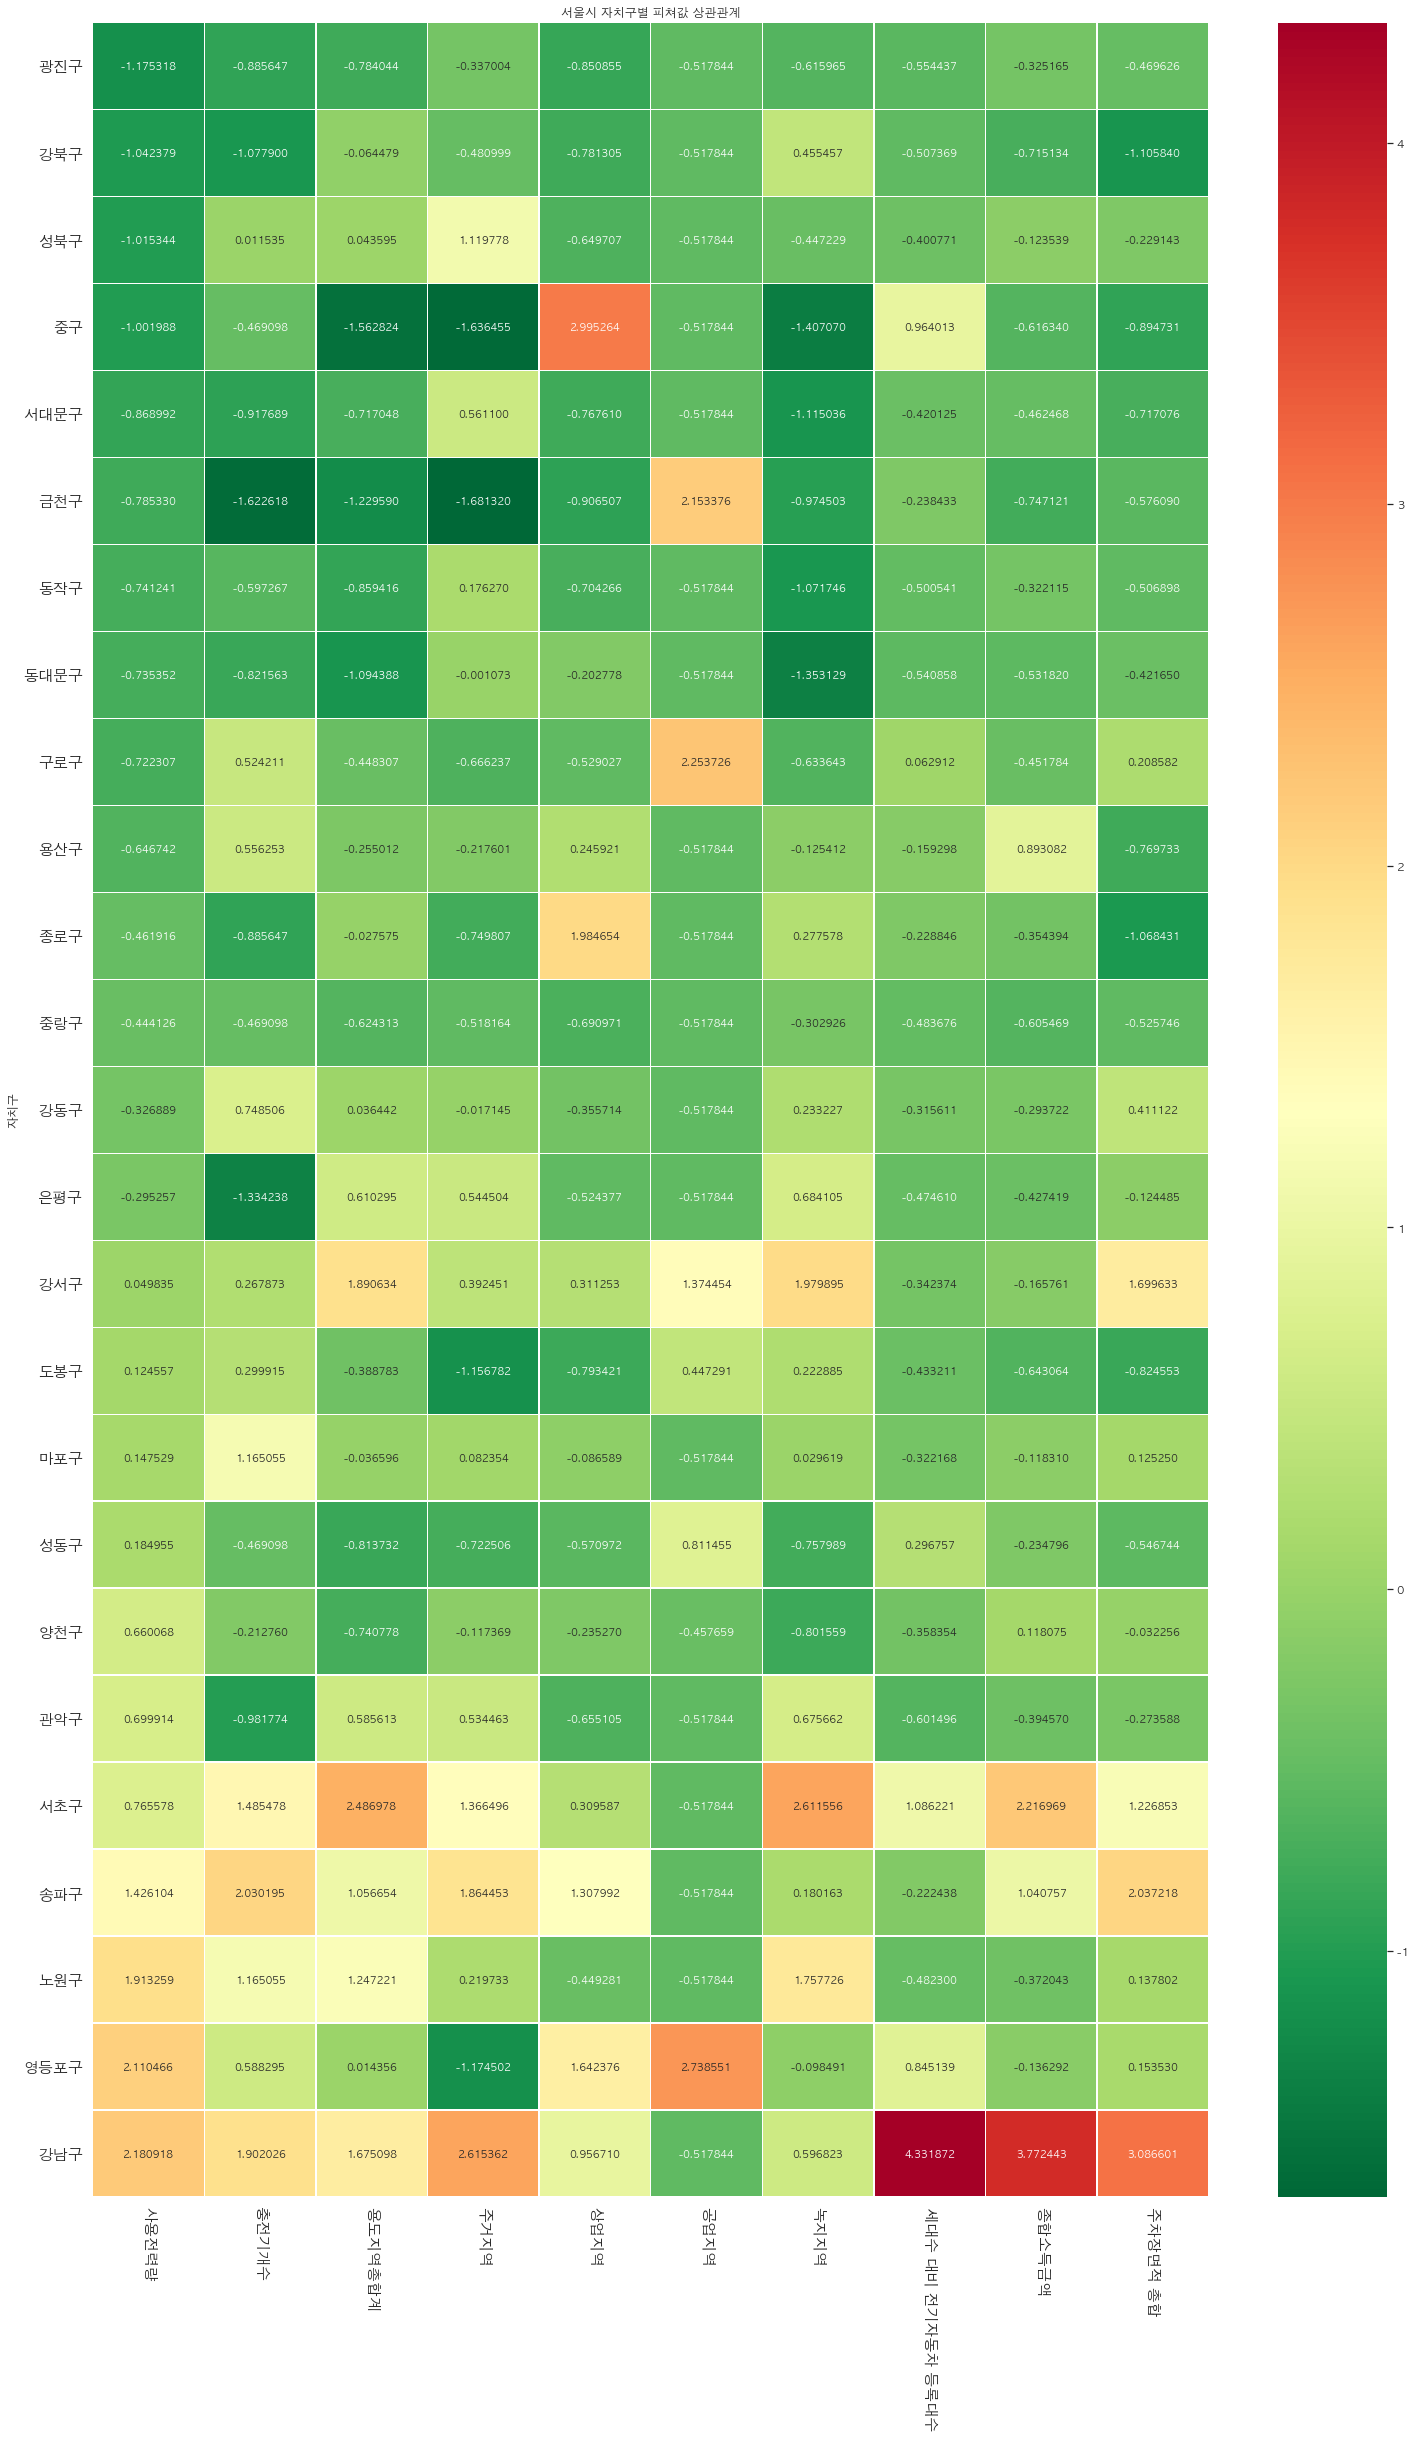

In [574]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


target_ncharging.sort_values(by='사용전력량',inplace=True, ascending='False')  

fig =plt.figure(figsize=(25,40))
fig.set_facecolor('white')

target_col = target_ncharging.columns.to_list()
sns.heatmap(target_ncharging[target_col], annot=True, fmt='f', linewidths=.5, cmap = 'RdYlGn_r')
plt.title('서울시 자치구별 피쳐값 상관관계')
plt.xticks(rotation = -90, size=15 )
plt.yticks(rotation = 0, size=15 )

plt.rcParams['font.family'] = 'AppleGothic'
#plt.savefig('ex_heatmap.png')
plt.show()

## PCA 분석

In [648]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [683]:
heat.head()

,전기자동차등록대수,사용전력량,충전기개수,용도지역총합계,주거지역,상업지역,공업지역,녹지지역,세대수 대비 전기자동차 등록대수,종합소득금액,주차장면적 총합
자치구,,,,,,,,,,,
강남구,7490.0,430598.40,118.0,39497268,24228249,1946139,0,13322880,0.032186,14162904,398603.0
강동구,657.0,140422.50,82.0,24556203,12965432,680697,0,10910074,0.003282,2142585,203140.0
강북구,302.0,57633.84,25.0,23636019,10980897,270342,0,12384780,0.002090,896816,92315.0
강서구,839.0,184012.83,67.0,41462497,14717833,1323788,2919995,22500881,0.003116,2520862,297275.0
관악구,413.0,259232.85,28.0,29563482,15325411,392024,0,13846047,0.001504,1844461,153117.0


In [660]:
# MinMaxScaler 열별 Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scale = pd.DataFrame(scaler.fit_transform(heat), columns=heat.columns, index = heat.index)

In [661]:
data_scale.head()

,전기자동차등록대수,사용전력량,충전기개수,용도지역총합계,주거지역,상업지역,공업지역,녹지지역,세대수 대비 전기자동차 등록대수,종합소득금액,주차장면적 총합
자치구,,,,,,,,,,,
강남구,1.000000,1.000000,0.964912,0.799526,1.000000,0.477531,0.000000,0.498651,1.000000,1.000000,1.000000
강동구,0.052157,0.252792,0.649123,0.394900,0.387316,0.141165,0.000000,0.408174,0.057949,0.100319,0.361833
강북구,0.002913,0.039610,0.149123,0.369980,0.279360,0.032088,0.000000,0.463474,0.019080,0.007077,0.000000
강서구,0.077403,0.365038,0.517544,0.852747,0.482645,0.312104,0.581102,0.842817,0.052524,0.128632,0.669174
관악구,0.018310,0.558731,0.175439,0.530504,0.515696,0.064433,0.000000,0.518270,0.000000,0.078005,0.198513


In [662]:
# 고유값을 기준으로 설명할 수 있는 분산량
pca = PCA(random_state=1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.503749
1     0.672786
2     0.794151
3     0.871942
4     0.922159
5     0.962540
6     0.987262
7     0.994881
8     0.999461
9     1.000000
10    1.000000
dtype: float64

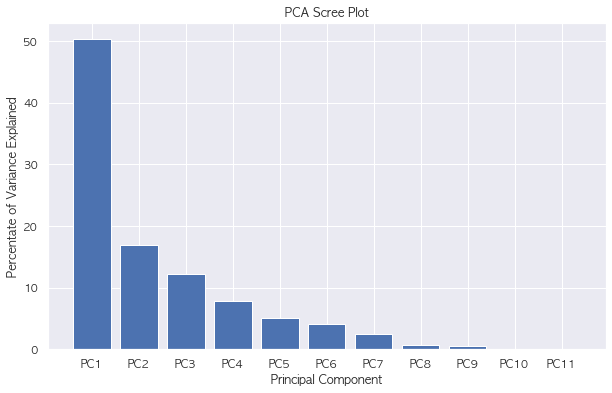

PC1 + PC2 + PC3 은 전체의 79.41% 의 요인 차지


In [736]:
# 고유값이 설명가능한 분산량 나타내는 그래프
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    
plt.rcParams["figure.figsize"] = (10,6)
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
print(f'PC1 + PC2 + PC3 은 전체의 {percent_variance[0]+percent_variance[1]+percent_variance[2]}% 의 요인 차지')

In [676]:
X_pp = pd.DataFrame(X_p[:,:3], columns = ['PC1','PC2','PC3'], index = heat.index)
X_pp.head()

,PC1,PC2,PC3
자치구,,,
강남구,1.870678,0.043973,0.601070
강동구,0.040738,-0.177513,-0.062745
강북구,-0.466877,-0.272211,-0.163346
강서구,0.474391,0.241229,-0.551127
관악구,-0.002389,-0.242111,-0.280351


In [686]:
def biplot(score, coeff, label, pcax, pcay, pcaz, labels = None):
    pca1 = pcax-1
    pca2 = pcay-1
    pca3 = pcaz-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    zs = score[:,pca3]
    scalex = 1.0/(xs.max()-xs.min())
    scaley = 1.0/(ys.max()-ys.min())
    scalez = 1.0/(zs.max()-zs.min())
    
    ax = fig.gca(projection = '3d')
    for i in range(len(xs)):
        ax.scatter(xs[i]*scalex, ys[i]*scaley, zs[i]*scalez)
        ax.annotate(label.iloc,xyz=(xs[i]*scalex, ys[i]*scaley, zs[i]*scalez), ha='right')
    
    for i in range(n):
        ax.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color='r',alpha=1)
        if lables is None:
            ax.text(coeff[i,pca2]*1.15,coeff[i,pca1]*1.15,coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha='center',va='center')
        else:
            ax.text(coeff[i,pca2]*1.15,coeff[i,pca1]*1.15,coeff[i,pca2]*1.15, labels[i], color='g', ha='center',va='center', size=15)

    ax.grid()    

In [704]:
scaler = MinMaxScaler()
scaler.fit(heat.values)
data_scale = scaler.transform(heat.values)

In [707]:
from sklearn.decomposition import PCA
pca_data = PCA()
pca_data.fit(data_scale)

X_pca_data = pca_data.transform(data_scale)

In [746]:
def biplot(score, coeff, label, pcax, pcay, labels = None):
    pca1 = pcax-1
    pca2 = pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    scalex = 1.0/(xs.max()-xs.min())
    scaley = 1.0/(ys.max()-ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i],xy=(xs[i]*scalex, ys[i]*scaley), ha='right')
    
    for i in range(len(xs)):
        plt.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color='r',alpha=1)
        if labels is None:
            plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha='center',va='center')
        else:
            plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15, labels[i], color='g', ha='center',va='center', size=15)

    ax.grid()    

In [747]:
data_name = result_6['자치구']

IndexError: index 11 is out of bounds for axis 0 with size 11

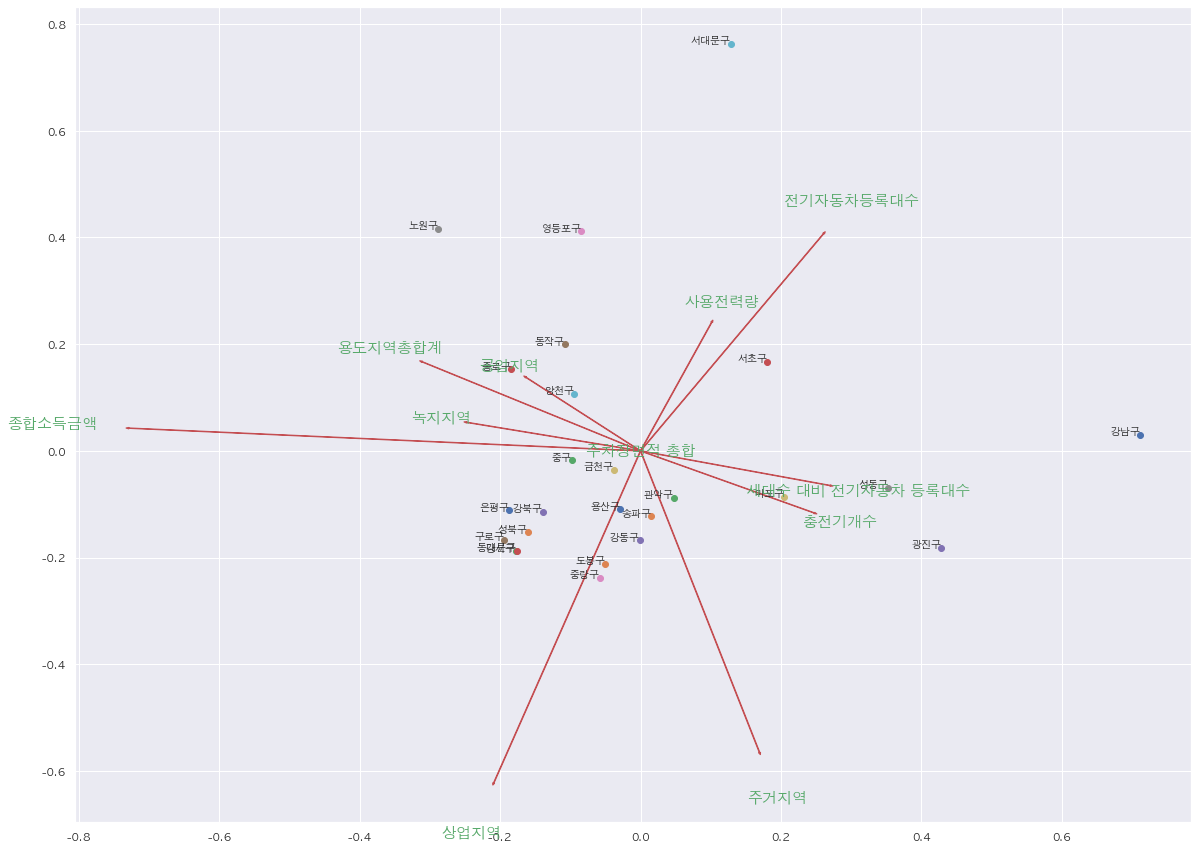

In [750]:
# 사용전력량은 전기자동차등록대수랑 강한 양의 상관관계가 있다.
# 상업지역과 강한 음의 상관관계가 있다.
plt.rcParams["figure.figsize"] = (20,15)
biplot(X_pca_data, pca_data.components_, data_name,1,2,labels=heat.columns)

IndexError: index 11 is out of bounds for axis 0 with size 11

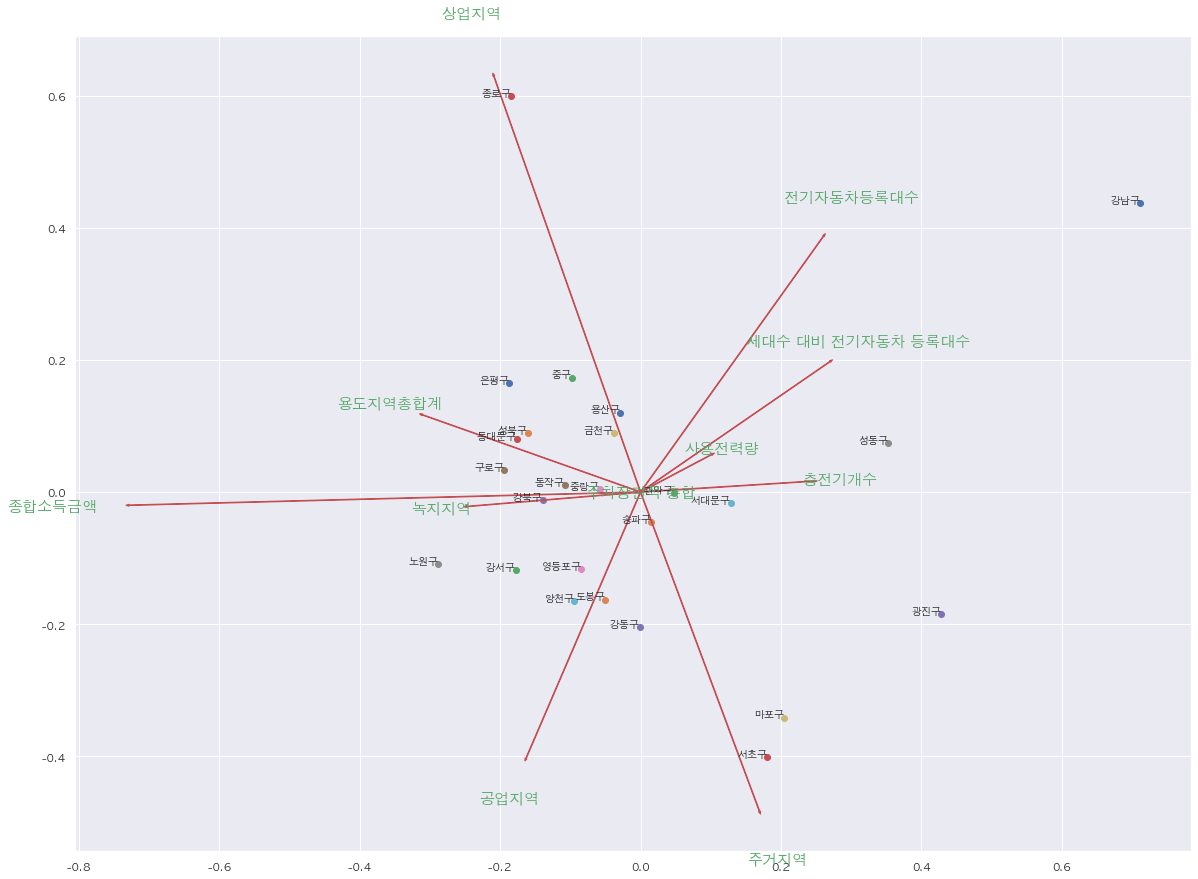

In [751]:
# 충전기개수, 세대수 대비 전기자동차 등록대수와 강한 양의 상관관계가 있다.
# 녹지지역과 강한 음의 상관관계가 있다.
plt.rcParams["figure.figsize"] = (20,15)
biplot(X_pca_data, pca_data.components_, data_name,1,3,labels=heat.columns)